# Dicas de EDA (exploratory data analysis)
foco em problemas de classificacao

### importando bibliotecas

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sweetviz as sw

from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings("ignore")


pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 50)

### carregando base de dados

Kobe Bryant Shot Selection - Dados historicos sobre os arremessos de Kobe

In [2]:
df = pd.read_csv('./input/data.csv')
sample_submission = pd.read_csv('./input/sample_submission.csv')

In [111]:
df

action_type combined_shot_type  game_event_id   game_id   lat  \
0              Jump Shot          Jump Shot             10  20000012 33.97   
1              Jump Shot          Jump Shot             12  20000012 34.04   
2              Jump Shot          Jump Shot             35  20000012 33.91   
3              Jump Shot          Jump Shot             43  20000012 33.87   
4      Driving Dunk Shot               Dunk            155  20000012 34.04   
...                  ...                ...            ...       ...   ...   
30692          Jump Shot          Jump Shot            397  49900088 34.00   
30693           Tip Shot           Tip Shot            398  49900088 34.04   
30694  Running Jump Shot          Jump Shot            426  49900088 33.88   
30695          Jump Shot          Jump Shot            448  49900088 33.78   
30696          Jump Shot          Jump Shot            471  49900088 33.97   

       loc_x  loc_y     lon  minutes_remaining  period  playoffs   season  \
0        167     72 -118.10                 10       1         0  2000-01   
1       -157      0 -118.43                 10       1         0  2000-01   
2       -101    135 -118.37                  7       1         0  2000-01   
3        138    175 -118.13                  6       1         0  2000-01   
4          0      0 -118.27                  6       2         0  2000-01   
...      ...    ...     ...                ...     ...       ...      ...   
30692      1     48 -118.27                  6       4         1  1999-00   
30693      0      0 -118.27                  6       4         1  1999-00   
30694   -134    166 -118.40                  3       4         1  1999-00   
30695     31    267 -118.24                  2       4         1  1999-00   
30696      1     72 -118.27                  0       4         1  1999-00   

       seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                     27             18             nan  2PT Field Goal   
1                     22             15            0.00  2PT Field Goal   
2                     45             16            1.00  2PT Field Goal   
3                     52             22            0.00  2PT Field Goal   
4                     19              0            1.00  2PT Field Goal   
...                  ...            ...             ...             ...   
30692                  5              4            0.00  2PT Field Goal   
30693                  5              0             nan  2PT Field Goal   
30694                 28             21            1.00  2PT Field Goal   
30695                 10             26            0.00  3PT Field Goal   
30696                 39              7            0.00  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
4      161

jump_shot



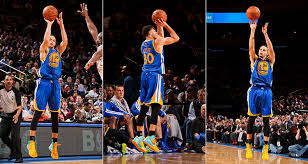

In [109]:
print('jump_shot')

url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhMWFRUXGB8YGRgXFx0dHRogHh0ZIBkdHx8bHSggGholGxsYITEhJSorLi4uHh8zODMtNygtLisBCgoKDg0OGxAQGy0mICUvLS0tLy8tLS0tLS0tLS8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKQBNAMBEQACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAQMEBgcCAP/EAEcQAAIBAgQEAwQGBggFBAMAAAECEQMhAAQSMQUTQVEGImEycYGRBxQjQqHRUmKxssHwM0NTcoKSouEkdJOz8RVUwtIWJXP/xAAbAQACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EAD8RAAEEAAQCCQIGAgECBAcAAAEAAgMRBBIhMUFRBRMiYXGBkaHwscEUMkJS0eEj8RUkU3KSstIGFjRDYoKi/9oADAMBAAIRAxEAPwDEAbfGcJNd0Fk73wipsq9V56Mdu+C0i2tF2tAQINyP5GAlAGiYIw1EqXwrhdbMVBSoU2qPEwo2A3JOyj1NsBIAsptaXGgiXEvCOaoJrdFIHtBHVivqQDMeokYpbiIyaBWh2Dma3MWoE2LgsxSqYwbpjRed56YAkTasz+FlNF3p1GbQjVS2nylBTpNAUSQdbsNRMQuKxJZWh0GVt38oFVfFqzIr4aH24/8A51f+1UwJ0hOBJLgTSkWwkzskw0q0XpwJJMCEuBCU4SkUmGorrTbC4qeXS1zhqC6WRhbqQsIpwHbM/wDLv+8mGkUKjAikkYEUlGEjVejDRSXTbCtFInlPDeaqKHSg5VvZ2Gr3AkEj3YqdiI2miVobhJnDMG6KDXy7IxV1ZWFirAgj0INxiy1Vl1TenBaVBejDtOgvRgRQXsCKSYEkmBJdEHqMCSTTgRS9gQlDRgQDS5OGktH+j7iq5fJ1An9JWqEOwF9KhdKz72J+OMGLkcOyF1+joWuGY72i2VzqmGaPViY93tG/v3xgvTLXzyXWrXNfzzVL4nwFSubrrpSlRI0gAkszNT8o6Kq8y59wjt1IZSWtB3K4GJgAc8tGg+/BVYY1LEpnDmpK2qshqLBGlX0GehmDMdv/ABiLr4KbMv6loHhzMpyNFGSDSdDzIYMGJswiOqr38o22GUvIfsug2MOioGxwWZNjYuYUY8O04rj1p1f+1UwkkGw0J1aRPwxG1PIVy6kYYKRB2XOGopVE4SkBegXQUxtgTqhstKyXhvJ5ehTFWlz673qFm8tP9VQu4E3JMkjYYwT4gkdg0urhsGAf8jbUDxZ4QpCgcxlwFKjU1MEkFerAEyI7bQD8TDYh9gP2PFGMwcYBdHuNx3Kg46C469OBO04tOdsRJpSAtJoJ2GHdIItG/COTNV69MEAtQcSfeuLYY+tkDBxVE8nVRmQ8FKqeD6g/raZvH3vyx0mdDvc6swXOb01Gf0lIPB9b+0p/Nv8A64u/4GT94Uv+ah/aU6ngmsf6yn/q/wDriJ6DkH6gqz07CP0n2XX/AOD1v7Sn/q/LC/4ST9wUP/mCH9p9lL4T4MK1qbVmR6atLLfzReLjYmMZMf0Y/DYZ8ubYclv6M6UixeLZDlOp41wBP2Vvz3HFV40R7ox5Cr1C9ztoVVPpOzKVTQqhQrwyH1UaSs94kiexA6Y6mEkLgQeC4vSEQYQ4bm1RNWNlLmWvTgpFpNWCkWvTgSSThoXpwIT3N29LYjSsDqSmeknAgikkyOmBLcJtReMNRA1XRp/PAmRSsXgnMUeaaFdmpiqRoqgauWwkDUsiVaQCQZEDpOKJ4g8arXg8SYXVzVq8Q8MrZClUqVmpC+mlpPmqMdvLpBAAkmTaIvIOMTcMHuonRdWTGiNmYDX7+i7OTo1chmKtOFWtQasVVjC1ECNUEEW89MHrMkWjFzTlla07jTy+FZXtzYZzhs7Xz0+4Ky7G5cjgvfDAmrF4CqRnFQgzUDKt48xHl98kaY9cVytzNV2HfkenfG3A2pVDWCkK5lhHssd/gT+PwxGJ99kqeJiAOcbId4ZvmAD+hV/7VTFyzLniAREhVF7T1xAalWOpo0Q6i/8AP7MSIUWuSFyTgqkgSSmziSgV5cCYOqcSpEdwZH4flhUpZlfshmxWisSxRmOrQfMp0i5UTqhjOmxIFu45D4shyuXpIZetGdnz0Rzi6VBw6s6pr00yr6Tq3leaAb8srDW9k6wQsYIorlblOnwqOKlDYXZtzdeent9FkR2x115zSl5sNDiu6TwCMRITa6knMvOHWiC7W1avAeZWnmqjllCig5k7CdIv88X4OhK0uNBZ8bm6lwYLKtPE+PUaukmtREHZWAF9R798elws0Ebx2x5kcl5t8WIkNlhHgDzTS8Sof29L/qL+eOh+Nw/72+o/lUHBz/sPoVJpcWy4/r6P/UX88VuxcH72+oWd+CxH7D6FO/8ArGX/ALej/wBRfzxD8VB+9vqFX+CxH/bd6FNnjGX/APcUv+ov54jJPhnsLHuaQdCLCvw+HxcUjXsa4EGwaOhCj1uG81kK1AwqAabg76dj1nWo95x4bE9H4eJ7uqlGUevHTQ61W/eF9PwfSE00bHTR04jWthtrrqLs6a1R1VD8T1vt3QNqWn5VP73xmfl6Y0yYeKF2WI2NNeegv3XKkxUk5zPFbivNQK3D6qU1qMjKj+yxEBvd3xAOBNKBaQLKj4aivYEL2BC9gQvHAhSFWCwYSAYJi3WP2Yie5WDja8jAuAIAJibx6G+CtEX2kzEmMNQUqnVVPuhu5b+HbCUtAmqtSQRJjeCcMIcQj3gDhhzGfy1PpzA7HstPzn3ezHvIxFx0UmDUKx/TbmGbOUk+6KAYD1Z31H/So+GK4RpauxBOYNTP0R5j/iHpkypGor0g+R/31+WKsS3Z3JX4OTRzOBVM4jw56NWrRIko5Q/AkT8RfGoG6KxOaW21RCD1thqCkZPMtSqU6i+1TZXX3qQRv6jCUtitez2X+sUuYRroVgGncjUA0e8ah6g4xkFpXSaWvbXNZrwvKmlnWpEyUFYT3ilUg/K+NgNi1zXCjSFZrMFwOw6zhAUhztKUYKcSUBa8DBvg3TaaOq5w1FSsvQllVpANz7t/naMRtWjakX4Rw8ZiqKNGkL7mNUDqSTtv+OK3uoWpsYHGgFYst4aqZLOPTYgo1IupBBmGQdhHtbHv1sTmmfni13tb8KzqpuzsQjHifjT5KtltB00qtIMSbw4Yq6md6cBbHocVMgzMzsOqukxdSdXKBlKq/i7w0hQ5vKLFI3q0hflHqV70yfl7ttOHxAf2XbrDi8IY+03ZUzGtYEmBCeqQVBAuLHCUjsiHANsz/wAu/wC8mGooVgQlwIXjgQkwIXsCFtf0ccf0cILMlqDVQSfvKoFQ9J1DXA6WGMUwOehxXRwzgIy48FlnA8n9czehzHM5jHTAvodxvYDUBbGiV/VsJHBZYGCWUNdxRz6Ul0VqFEDSlOgulYupllOqLFvIu1rDEMNq0uPEq7GkZmtGwA+elKl40LEvYELwBO2BCTAhewIVjrZAIzUwSEVQajyGBYRIUxB9qwva/fFZJ3WloGwKG1VQhAH2HUf79d8S4qGlBctlJEgwRusdtrjqcFpFt6hcvlCJFmb9W8envwzoaUQNLUemMBSaFpv0MZMaszWO8LRX/ESz/gifPGfEOoUOK14RmZ18ka+kHwiucNSvTrfbUaYXlGLgBmAmfaMsRbe3TFUU2XQqyaAuNhUD6Nc3ozqjq6OvyGsfigHxxdiR/jKpwrh1oBRP6WcoEzq1QDFakGkdSJU2/uhMLDutilim5ZLVDqNMe6MaVjKRlItgQrn4G408Nlmby+2gJ2P3h8r/AAbGadn6gtuFks5SrbxWpSoqUWjFStSd3q9WmlUgHsoCwBsTJxNh0Crlbq4hZDQeDNtu2LCFSwi7Sddpw1E7rnAklV7zgpO09TzBBF5336TvhEJh2q0n6NeFFAMyCSHBAAE+ySLg7jUBt2xz8TJTg3kuphGdgnn9ldqFUZpXoVdamkQCYIHdYOxB7bx2xVuNVouj2UE8b+CMzm0yq02pkUeYGqMxA0koU+7M2YWB2GNGHkDGm1ixUZkeKCf8M8FqZSktKuquJKl6cspU7awVB/V2iIxnlcC/MFtha4R5HcFmX0geHVyeZ002Bp1F5iCbqJIKnrAIseo9QcdGGTO3VcjEw9W/TYqsYuWdLqwJ2ivANsz/AMu/7yYEkKwIXSLJuYwihdEwTp2M73t8t/WMHin4LgLhoSRgSWq5enyPDxWDqrK1SwmAaiiTewKKvzxkLgZgFvawjDkrLsvWZHV0JVlIKkdCNjjUQCKKxNJabC0D6Rslz8tluIUxOpQtXrGuWUn0Dmokn9UdsZsN2bZyWzF9sNkHELPIxqWKkkYEUnKNVkIZGKsNipII6G49MIgHQoTcYaKXowIR9spVqWpo7ozFUMQfJEyskgAG/TEGj1Vptw7kPZmUFgILmzAQCBOx7ziVWoWW2pVdKYBvMIpm13N5H6sWIHYbdI6q0URryTmcyj02UMUNRwr6VIIhgCJb2Qx7T3xI7qHDT0TVTLqtNJUBvaYTdhJ3va0AAQbd8NwLSLSblI0Wr8H4D9UprQT2yebVIv5jGlAfvBF8s9TqMXxyMZMXPytXawEQjjLzxUvivH6ASqzGmyohYaZ5gf2dZHeWidrwZ6TaCaaovLWtLjoqZ9H3B6dOtUrV1l1SKSibMwIZo/SiIBmNU7gYvxU4aMoWTCYVxdnOlKN9J2Y11qawfs0hu3nlgOsQIP8AiGFgyersqWPoyADhuqKlKT6Tjba5waSdF3mUMjykW69fW+AIcKTnDapVwyuEIMgmYkEWsDGBwBFFDHFpsLUafDM3WpVsxWhaSJUdS5JL6qTkql/ZDReALWJ2xWG7G1pc7skUskXFtWsiWooGxnAmaXGBJdBTvGBOijHhHIU6uYHO/oqYNR9zIEAC1yC5UH0nFuHj62VrOf2F/ZVyPyMLuX+leeN+Iq2hUFWacKqrTYKoi2gCmoHLEWDXG2OvhYIonOJa27Na2a0rcmu/bwWPEPe5rcrnUQL0oXrfK1beDZhqukLGhgrienkRSPgV0/A48RNnEr2P3D3X/wCYm/MEHwXrcKGdQ1zeQTPjnxdTyLJQfWWKh4pxABJAkkjqDtO2LWYeV+xCg7FxRnUEqhcV+kus66KNMIJ9pzqb4CAB+ONDMEP1m/ZZ5OkT/wDbbXuqbm8+9WpzKzGox3JPyHoPQY2NaGtytCwOkL3Zn6qPE7D4YaWh2SHDSNIrwEWzH/Lv+8mBJC9WFSdr04KRa9qwUi16cFItJOCkrWy8TrA8HVQdsihI+FP+OOcD/wBRS6zm1hL7ll/h7w/mc7UNPLU9ZAljICqPUmwnoOuN7nBupXMY1zjQWq+FOF1FyhyOcp6ILUWB6rU86OO8OWgi3ltjDK/LKHN4rowszwljuCx7M5KojujAakYqbjcEg9e4x0g21yyaNJpqJAkx/mX88PLSWZNYihewISYEK00c+1TVUaoKMMEVUOkAOSzt7VoBE7z3EYiTrY4q5t5acdlGz+ZpH7NARRps2kE+0Zv7pA7m0b4K1tIvttJ2hRWqKNKbaWaxgIxJN9RI0gQSd4B+KOhtTAzNACg5SgNSaoK6wJMgkTLbGRAOwPXCtINpGs/lVWqzDSdNbV5DYqCCF7ExFrkk4LLipZQ0LXeK0KtNhU1oNFRS5NhpuW+Vj8DjkZHAkgWeA5knQeZ0XUMrco4D7Uqxk+HvmWrVRpFOqSdJA2DSJ7EGNjII6HbuY/HYbBRR4aYZnta0Xrd1zGuvAHQjhW/EwkE0rnStdTSSa4V4fwo+dP1JWqVoJRUEzHMYghR7/LJPZSQOmOdOyLEFkuH/ACPvyIOvsRpwJIXVhxLomObNq5tV33t9D6Ws4z2ZrVhUrO86qg1EbEkGB6KFWw7D3Y2Na1oDQuc4ufbiUP09Bck7Ab+7viSiTonK1G03F4v6YAhwJNI14c8NnN1Wp031U0XWzkEaQYBIE3bVAAO/WACQONC0NbmNLR8zxJhlvqyyKSZd0Und9NFxJ6X3jGdr8zgtkkeVhveliiNGNJCwA0kJw0E2lRZ+GBACdp1YBHfESLKm1wAIRXwjnFStpf2KgCm0zDqwB9CVj440Yd4ZKHE1uL5WKvyVLxbSPDzo3XmtLz/Dqj82mhAIIp/aHRqPtACNQMrJ+I7YzPxmDhEU5cXg2+mgkADSySQQAQBdWddNVsazEzB8QaG6AWTv4AWNQTx005IP4R4+csTQrowCsdolfNLKQTdZvINiTvOL8Z0W/FuE+HIJcBYJ0cOBB1o1XAgitt1ThukRhQYpgaHt3KJ9Nbas3SeDDUEKkjdSJEdxc/GR0xGOF8eHbnADszro3yG9DkoSSiSUkbUPus8GIoCTAklwIUk7TJH8/wA/PCU0Q4KLZm8/8O/7yYEihfNBuVBPy+NoxPNrqFCtFzrH6I+Z/PBY5J0uMRQvYEJ4ZlusN/eE/txPOeKVLXkpa+HUqdOGatlVTp7RVRp7CHUD544bnZcST3/dd9nbwoHd9l76L8otHKHVzEq1K9SnUZbcqFCKHE2YFnIkGCdtsbZyC5YsIzsEqxcTzAI0LWLutNSNRGqzXYgdIYX9/rjFKTltboaD1j30hZDl5xmG1ZRWt0Lzr/1hj8sdPDvzxgrkYqPJKQFWsXLOvYEJMCF7AhaNxPgSUKSois6lk11l06HGkkgWlGkiFe53MWGLDEHVrqm2Ui9FVfEPCORpPND6vuxdRugYixbTBMbTikOskKb48oBUalCU5VtVQyIhSFWCDctq1X7CN5w1EHTRO8K4dVc6gpCqY5l9Ctvcj7xtb1GIuIG6bWvcdF3Wy9YpzX1RqMORIZhHX1tf0A64BSm7PxWp+IPEIq5VNJOrMAORIlAPbDAbT5NJG4LbRB19FdFPGJE0h0bqAO8aE86vbgeehFHSOPHUdW0UTofI6+v0XuGZkimqlagC0tJ0oT7RQfdBgwu5HrtGOJ0lGHTSEObZkvVwH5brcgH82wPAgagrp4MtETQQfyjgdzvt4cuPehHjhUhKVMiJBBcSJJfTsLEMNM73MzJndgMNiW4Z5xGhzgeWXceOnhtQqhkxU0fXNaz9pPvp6arN69Zz5GMLJJHST1JG7DFxrS1VZ4J3LQxd76kA0BVt7zcaRA9bnFeyn+YkpcrWqVWFGnT1s7WUCSSe3aO/S+JKGa1qqZJOH5ZlLIGYKcw4IClgDoQDfQNRgx5pnqAMsry40F0IIwwZnaIk/AyMtXrlkqTlqpBAkr9kxsTsLwbTt2OCJpsKOIfoRssExrXPSYEJylU09AR1B2OBCedFY+Tym3lY7k7wdgPQ/MnCT8E3SYowOxB+WHpx1CNeC2jjdFalRaWtaTq1OvDsLAakaD1IVVa/c3xz8PierEmIY0yMd1kdtbuXU8WOVktNchpa6D4usyxk5XDK7U8BYOvuqxx6utWvVqp7Bax6GLW7yb/HHruhcPJBgYo5PzAa/WvK6Xm+kpGy4p7m7H7Ckx9Jtdny+QklgKZCvESvKy1geoD8wf8AnHMxTe0XDaz62VvjPZA7gqBjIrEmBC9gQlDRgQi3AWtmP+Xf95MCdoVq/mMCLSTgSXsCF6cCF7Amtb8N8zMcKy5o+V6NU0GJFtOoVGf3KjSevlOOZiI/8t1ZNADmToB5nRdLDz5YDfD6cfZMcPyear13rMq1qa1C0nyOCsKfOvm9lApmQ2k22ONeO/DYJghkf2hx01J1O52s6cfJUYV8k7zI1tNdsPp5p3M5rOUszNSmNNQCNBmNIURGkEBQWgEG0xuxaiSKObD9bE4EN0NePEcyeXgeAF8M5jmMcgon58/3dX+lOopzaKpulBVf0Ys7R/lZcW4RpEQtZ8a7NKaVOxqWRJgQlwISYEK3VnzOXBrZYgUYjm0GLp0OmpqGpJmNFVRPYjEjISKKCBdhcZyvQzJX6yr0KzKGNWmpZCdvPS3Sw3pmB0Q4hsmbK4rcA5dMME5quYWtTYukiIUaBIJBPlcBrbDFhyltbHvKmxut7+W3upFBDUptRpEFFVQ030MxOuPKD7RaFvsLmJxSIy51hN87I26nfZWCr4S5wXLZas8alRxUFwztIYBBBWQ1ptBvecQabOi0ObTKKh5+mqqVSQqgKD96BABPrAFvf649pHHkiDRwAXk3vzSLjgvHqytoMPcATY9APTYdb+sRjz+J6GhxUpLtDetcfncfddiPpKSFlVeiXxXWaoC7EIfLG4jSZUCAb42YjCxYTBCKMaAj/azQzyYjEl7zrR/0qPXrEiGBm0nv/DHFpdG9KR7LUaaZfUwYl6e+yi9lW12i5nriL21RV7JS+xwAUrwVxClQzLOyO00m0MBOkQdZgCZgaZkQJmxtGRrq7KlE+IyW4UPVC+N8YesdMstGAFTVYBRF4sWxCGFrBpvzTxWIfK7XRvAcFr/DuILX4TKg+TKVQSCd+XUDEwRIJU2IO2EQc4Un6x5r3H00r2WB40LEuk92EVII3WWkmWE5b7WqdSu9QkqogDSgN5hjLjqIxAE3Vq0sGWwEEO98TVNa0US8N6TmaSuQBqkE2uBKAmDALBQd7Yvw7A6VoKrlcQwkK45+hqqNNVbk7u0/GWj5E7Y9KNNNAPH7LkGibN34fdQqlFJAOYVp3IfUR2AAm/vOG0s2DtfH57pEECy1HvpJpK/DOHlRCoAg9LVVj3xRGPPY1oZI4Dn9guth3F7ASsvzeVamYYQfeDuJ3GMYcCtDmFu6Yw1BO5WjrcL3PeMImtVJrS40E9nFC+WBIO4/YO4wBwKb2FuhRPg2VKLXLEXyzEAGT7SfLCu9kFlboIVHScNKlzhpJSuBFJMCSW2BPRax4Dz3/wCnrIJBWvCEEeZm5ZCkdARrPbyG94xp6Owofi2yO1q6HAaEX3nWu6+eqoxkxGHLBpf87KX4YzBFELD6TSqTpRm8zG8gKeoa5FpB2N+J0jFmkkcS2y8buA/KXEUSRzHHcEXY07OGc0RRijQbyJ3ruPwjmpvEq6IMsaDM5WqGhjeAUVkuNtMj01HGvoTCYiYYlk4DQWiiNr1cHbniL8lz+kJmRujcwn8x+lfcLJvFdfmZ3NPIM16hBGxGsxHpEYsYCGgHdBNklCAcSUV7DQvTgQvYEK1fR/SLZsvz2y6IjM9RdMxEBfMdPmMCDv8ALFbiGt1VrWl7qCsnFqCUqmqvm6hZ2XVVSoS+jdqZEHUIM+1aSQrbYpa/PwWl7DECBx7tVH4JkalGi1VKqgajFWjUXQ6hJ0NrgSzE/ZOoJgeW2B7pDKOVe9/ws7KOlIPmOYrCrRpNSYqGdqUqgmJGkAALIB0m14iIiwOOawdCFTV8EV8J8ZfL5qkKK1KxZftUCjyvrDU21WUIWCzcAKSCQcTw4LrI+cFZLICAEL4nnOVWqU0nlhiIqA2uZW0i20g3IJGO/Bi5mtGcUO+1ypsNGXHKb8KTFN6WpWpsyv8AeAMj0KyJmJti3rY3OzNOvt7qstfVOGiI8QylWtlGqsp5SbupF2lQDpu2gAlmgWiLXxj6RxQeGx+a0YPDFuZ/BBKPAWqrUei/2SGF5kg1CBJhQLTvHTUok3I5JcBut7WFwsLnhFKUqMwaoFAsJISZljaFNgOhucJ42oqcR3sWmjQIpoy1NckkhdkFguog+Un9Gx23JxK61KgCTYC7ymQL06p0ahTA8w2XVN9x0XsepxAnUd6sDQQb4K4/Rrxg/VOIZNyIGWrVqd9jymFRRJm4Ctaw0nvhubraqa7QhZniSiuk7YVJgqblMm1RgFIAA8zHYXNz+XpibI85pJ0uXVN53L6TZtQ2mI/DDdGG7JB5dqVP8MACozTcIYtsTA6+8j5439FMDpjY2CzY12WMVzRtKpmxAIBAIABYGxk9gZF+gAA79tmrj3bLnvPZHujfAKKZiqaVVFYBWI3Bnl1CIMzZlHXFWMcWs8x77qeFYC71QvxzmKlBzkjV52WpMSiMoGhganllRLEF3kk3m/YeexQdYJvtC9eK7EOUDSjXsqlQotmKmlYBMm7GAB3mTjLo0aq7WU0FxT4a71OXSBqt+oJsNz7h32wwbFqtzKNbqVxbKrSCBQQ0eZiwOpoBMAGVA1AD3H4Qa4lXPYGjTdDWZhBPUWkbi4m+/W+LKCoLid0S4CZGZn/27/tTDUUKIwk14YaF44EJMCF7AhXHw0OVlg5VvtKrQdwQgUAx6MzScdvop1RuO5tcvHtJc0cEVyvHWptU0Q6BiwiZAa7Ag/otqAldiIPTGbEdG4bEPdmsa8PfTgb46WKWuHHTxMAFHTj/AD4eNFOZniz1hqJsqnTE26HrY/LbHT6PwGHwcZ6kb7k7nx8FzsVipsRIM/DgFnVZIYj1P7cebcKJAXaGwTcYSF7AhethI0SEYaCFoHDOPUwDRohTTVfLqpIrG6zq02c3BvJ8pvczmljJFrZh5QDlCkcWzpq06VGqyedjLaAurpawXyz8LRscVxsslzVfNIQA1yiZ6hTy2YZqWlEeiymnMhm8wjST5lO+k21AfC9pJCxEAO1QLiOeflU1dtShRAkkCxkG+/Q4llsqsmtla/o74/Vo5XO1DLJTWkEEwAecPJPTUrvfeFPbG3DQ3qNya9jr5aKh7wNxt/P3Q6UYS636kdT7hbHqQ1pGoXFzutRM7mdIpoAulSXkL5hIOoSNxYfH4jGGWNsUwkHLXyta2SF8WQ+XnSNlkXLk1QWC6hAG4YHVcCegIMjpjn9L4YNe2Ru7tD48CtvR2IJY6MjQa+R3UPNJUytNVRxpqKrOg1EoXUadbMCAxS8A9rC2OQ8NzVa3tzsZdaFOeH8ovLSiqsj1naWZl0wikBYjXsHE3Ekg2OHTXmjuhhfG260UDi3h6rlBUpU2FZKyrpMENY9rixPU/LEnsIcFW11NcBxQzIZxadMjSzioFPtAXEhkIiSD0IJgdDNo0Duhry0UOKc8MUVaszqSoFGsQpaZPKcEA9oJN+gO+JFVtG6HUeD1HAKhmkEyFJ2F8RzAKYjc7ZOZPw/WqrqpAVBadEkySREQD092E6Rrd02Qufsus7kK2WXTVRqbPcAgiQJv8yB8MWxyNc3slVyROY7tBDWxJQUnhRguey/x/KT8MbejyWvce5UYgWAO9E+F1fOY2gkfMfmfljqYR+Z5rb5/Kx4htM1Vz+jVS+bLRIUAfFqtKkPnzH/y4qx0ls8z7A/PJWYVga7y+tf16oF9IVRTXrtDFzmKhBHshdRm0bkxF+htjB0k3/HD/wCH7BasE6nSeP8AKA5bJNUYMhp3ptUa+kJpkeYmBMgGOsjeYxzDVULv5st9HRxr5zUNuZSqEHUriQRsb77dDPxwi2tErtHOC5/ksK6oKxAJMx5RcXnYn5x+I9sTonRuJBPEcv7TYZMweACBeneg3Fc69dmYggSWCzIWTcDsPTDa1rWhoJ001UHlziSR3qRwCkOXmWLX5DACN7pJn0t+PbDvVV1paDThoSi+EmlKECcNKlwMCS6jCTqir/RrczhuWSshpBHdUYA/aofOzQBq06uWupZklvWOjhDJkdlbY0ujR+b+yzztYSLNH1QmjmMu26ZoOotpKuVA6yQrAC3pjWZYrAdmvhz8uKziOSjVVx+bKTwLilOnXQVRqohtWogrqFjDSSLwFgYZnLGOYdiDRojcfAl1WZzXcQRoqhXdmJZt2JY/G5xwl0qNLiDgRqkw0kuEmucNJbhW8N5Z6CpQVKVpDKB7QtLndo1QZMxOKTrutI7P5UL8X+CAmSatzGetRGoljYoBDKqgQl5YTJsZN7SYABlAUJSXak2s5qo9cLLElRpFuhNpPQSfxxPbVVAEpa3D67eQ0jIALE9IkbkwARHxGFYCZBKuvDxTThVCmv8AW5irVYzvywqKD7tUx+eOz0RG1znPPAfU/wBLn9IPc1gaOJQrMWAj3n+fnjuHQWuY3khdapqcDpBHznHNllzy0trI8rLVgz8JlWqquoJUpagT9xhVR7HfzGmMVdMg5GAcz68Pup9GuyucVX//AFpWpkFZckQCZVQokmIltRvBNo644DIw11/NV2Z8SZW7Vt5AI7TfMUstRrr5m3C+0GQ6/uBQRJglgZNj1xJjx1hKTmvEQ5KRlOPPnDUotQLO6xTWgfNM+YktZByy8sbDFz36UVQDauGU8CZSlQQUSDmIH2rvqmWBYACF0i+wm2+KSwOCsZIWHZVXg/B62X5lCqNDAuCNJFNtVIkEMDBgKSZEwyGOmIuaLtSY4huWtChVDMLTqqU1U5CsiqFPtQHEHrYiPyjFDrctbKaUR4DlwGDrrQVGMMsXAJEiRF7+44qeTxV8QZu0qL9JNUuuUZ2Jcq8g6bRyx921yCfj2gY0YXisuP8A0+f2VHcT8MayucEW4Fp0v5BqBB1SdirDTG0A379MdPoxpLnEcv5WTFuAABXeQYU6dUxu+lT6CCR+zGrDHqmyHhmNKqUZy0dy1z6JuE8rLJUceevWpkT0VdVRfmVDfEY40mK62V0bTowV/wDsd/Sx52ukIOrjDju76DZZ94ty6fXNLmV5tSbE/eEWW53MgbxGNGKkEsEEp4t+wVELCyWVg/cqzxGuKlQcqktPT7MAKxjqYtq6+m0nHPLxa1dWQp1Dg1fMU2zWYraVLMNTyzsRJP8AhBkST6CYwE2UC0xxHJCnTo8uoSj0xUa9wxs3QACQQNzY98Vl/aIrj7KwRkga6Jvw/lFeuBUllgyAYm0CSItJE7fDfAX01DY+0ArOtOm1LM8llVWpMAoWAVDrBJ9+/vB7YgxxLtQrZIwGaFUEnFyyJMNJKB0wkwEqz064E1L4RlVqZijSYnS9VEJG8MwBj1g4kxpcQEnGrWmeNq6vmXDqqpRmkAoiEpmAo/dG1vW59PhY2sgB5iz8+fRcaeRzpa5afPn3Q/K1adNOYimmdBgqxBaROn9ZI6H0nF7o43Msjv8ATVVtlkD6B7kmUyFBgUjUGUoe+q8kfCP/ADgfC1zC3ySbO4OBWd1UIYqbkWkbf+MeQIo0u9a5P/jCTUn6sAATJnYL/Enb4A4AmVy4MTp0iYsCf9R/P4YEtVzTQR5gf9sBsKQriFu1BoXlgyI8pNpAEQZ2lVUx2ntikq9e4mxrUyrHSeWyEFbkmB7XQ9x1semEXphu45qhfRiujOPNmXL1CLA6WUoZIIPswTt0jri1/wCXRUR/moqfxXhNLMcQytKmqq7IQ6hFVdXn0g6RpLgBiSeixf2cKHsjMdlZiKLw1u6k+K+CnKZfK0SwIXmFyNizPJj0gAAH8Yx0+hp800jDyafd4+eKwdJw5Y2OHMj2aq5UQuoCiWZgAPU2j5k478zgIy4rkRNJeGhBMo287kH88ceA6m+9dGUaaK7cEy4rUSjIagqMlOLR5tbXJuJZQARcE7ixD6Zk/wAcZHG/sjoyO3vB4f2o2T4I+VzKJTpAuoNVlaJZVJChWc36NCyZB/RxwAS8LsZBG8BHuAq2XOYrvTakKhRaYYrGkkMwEkgAHy2mNQB6YWV3LRaXSMfl11HwKqeIKvKzVSplfLqku4bSDqaStiAFlQYF4I9ALW2W0Vjlpr7aj1UODRbJVHzT1SEhGKgOaZuqirAgqZLwQBJmMOMm8qjKLbnRPN8JrJTIU0DK1TWIaG5rI5IVnaX2QxGwntiwwu60Crv2vmo9cOrPd9lRsvkFfMqa0UQoUFRr0wvtXUl4MMfLJvA7i1mBlJcK/L73ySlxLKa7ny7lp2eyuXzVNFQ8vlqNBpnUigKLf3Ii46SdlJxRPA4dlwoqyGajY2VG8U8O+tLXI1Ctk1NmYktTBOsX+8pBcEAAq0XgYUbCwUR3+qMQQ82CqBkaL1GFOmssTaP4+mLo2uecrVlcQBZWkcb8Jvl8jlqVNNdZnfmkADzExBJMBVKMuonTABtqxPC9IwwySwvIBAadfPbnoQdPsU5MI+RrXtF6kIbwjwrUqOi1VZaKXZmBCwDLksYEfG9tsbMV0hg4MN1hkB0trQRmcTtpvqe7ZZo4J3TZMta6k7ADv/hazwvjmT1U0TNZdnFUsFWqm3JqKoEN5vMQIGPIdFzGCCQzBwcbOrXC9uJFC9d12sURLI0M2CzbxvRpU87oquEVhzeknUbj/Mh7+7HRwGL/ABWBgB3YC0+VV/8AzSzTRdRO9w/UQR9/dZ0mY8wNge+NGWlEyWrBxDi61crTo6lD0zAMwGBJubwDJM/P3AQa4KDTrfWHo0fMXCrSRUgydRt6kki/8MIMNlPrBopFBFoZplLaWR+WTIgNJUktt0J1CALG+GWWKKBIQbCnZHNg5fNLquaTGIuLp6+n7MQYyjatlltlKmzi5ZEurAna9qwJJWabnAnaJeGK4p5zLVGnSlemxjeA6kx8BhtPa0SOyuvjU/b1wYvWYEenNqavnpx6kD/p2jub6f6XGJ/zE+PqqtRrksWmSSTB6/7SRjDDI5zs3M7fOGoWmRoArl89dEX4E2pgCYlt+0k3+V8dPDvzNJ7yfcrDO2nAeAVerZQnSQSZ3JECbwoAuZ2vF/njx5eCbXohGQuszTGtNbsw1aWYiy+gX7tiTv02EYW+yAKIJXqettRYSEa6iBFx5h3JNpg7jocMtKbTZtEM7wWopzC0wYR50KRUUrpZplCxlUjvA138pwqOym4N1LULGaUAK9yBEqoNukzF+nyxJzQDpRVYkNaharwnN60TXoDgiQj6on2TPc6fwxRuFpd+b3RniWdpU6OuowVVMk+7033iwnEHC9AgGtSgvC6VFIr5aiVrZlmFPmuAanNViVv5UVhMD3XGKw57n5LVwYxrOspE81w7M0c0lTQRS5euoDG6AlAGFyW8ohTBh57Y6M0berAZsFgil/yW9A/EPGKGayyUjWCVlJZecSocBnsXewa5Bk7j3xzMJLLg8Z1xaSxwymtSNbutzry4EjgL1Ytkc0RYDRsOF+FUmfBvA2fM0C3LZdRulWmwDKjNJ0FrAAdrlcehxPSsE0PVxE2RrbXCv/MB7Ll4TAvjf1sgFDbX+OSrXFPD9dK9VUouRrNlGorJkAhZKkAgXA77Yyx9I4e+24NPHN2frofIq6TBy1bW2OFaq4+G+GV6dGjZVcu9TlVfKzrTSwWYipJ1AH9AHvirF9IQYt3VwnNkG42s3oDsa09VZg8NJBb36ZuB+bqveMqLl6djTKUBupllJ9oGTZTCabEXN5xTG3LHmtaZgZJcoGwUjw7lzVysuwpIDyVqaiJNiVtJChRfywB1kAYheW+9LKHUK2+ik+KuADL5SkaqF4mSCCEVmGksQPvWEyQLD714tD9+ak58R7PJPcLrotNGdarTGoUoRhSYMiXFSdUqfUieguNsWQU3gGhSL5nMUJQ01RFenVWmNTsF+zaSC6yGK6VM9AL2xpw8z3PYwnQOB+eHDlZVOIhayNzuJBHzx/hVjM+H8xUoJXprqNUagoPnABIVtJuVIAIKz17Y9K7FRkGM/wBfPFcFmHkBD0xwDjlXKVQuapVKSs86WDIUkwWAe5OmVI3I6jfGORrcW0Ue0Nv7Wxlwk6aH5orrSz1IVBmAUqqsK1SnsyMVUipHsOinUQQJCWA0kY5crJI6a8VWy2tc12oKoLZE5DNZinS/pBU+zn+znUlzEi4n+6Mb+j2/mNXeg+6xYo1lF96NfSZ4hFXJ5c0qjI1R31ormw0gMjQBqXzKATYgTuWC4sZhw1wbIAa1BrlxCvhkzC2nfdVrw1zM1SrUqza6dKgdExKmwpgNE6RcxMWxgbhYxIZGijua4+I2WsTvLMhojwGngVWaWXBgHrjRqVQtKzwp8ii1cUqqrR81dgHJJDaaalxq8rEeXpF4nEWYUQWwNy8T4nipPmD+19FQM061HLaFUTYBQABNpC72ww2knPDq0XeVZDVRWVdKksYUXgEx7iQBgRdon9HAH1kvb7Ok7i3UgIP3/wCOJsGqgh3iTKmnmHBfUWh9XfUJMzeZnfCeKKdq91Mzy+FVMsFADZYVCwKyz6qRbV9872mwFhtjM03ItkjMsPosvp7ezIxotY6NWvc0fo4dpJTVH6IwX3oTM4SFIpi3tQRcYbdDaZ1FLQvHNIpm61Mk+ZiZ7hpP7WPyx3ejcS3E4KPXcZT4t7J+lrl4qIxYhx77Hnr/AEqdkDLQbWNwJid7fztijCkdZR5FXTDs2O5WXglHTmqFNSDqqIk9PMwCn8Y+Jx1H1FGa4A/TRYmAyP15/wC1WaR8xWp5LmQZ8h1AgiBI7Te22PIm6pd9pF2VJ4vmRUrK1VUPLcrUC2NUBvaOjy3UhdSm8b9cJrcoU5JA91+q5y+YRGKqgZC+qNJeyhihJ3gCdQsYB2xICyCVEOAFBFslXMXFJH01L069Kkzc0HlyWYEqpJMGTpPrdOab0S6wUoB4a5LE5ek0mRFZQBPQBKoEAzhkcikHA7hOZ+q+VdqFWm9Jk8h0VNiOsj4Wk9jiSrGmyY4BlhnK4WvVrNTUFmkk9QI1GQgvMntAuRiqR2RthXwR9a6idFcK/GUTimXFTy0Mt5dI/WpECATvBRQPfiELRReOKvxLu2GDYLS+M8RouhR1cr+ojOZ/uorWjvY4l1/cl+FJ3KwrxPXFTMstMl1UimncgWHqSTJ+OLLoWdFQW5n5W68B3q7eD+JjK01V0CQCBMKZJGp1O5kkb2sBjA6UuNsFruf8e1jMk7wzldanj5Kr/Slm6VXOLUoxBpAMQCAX1OWielxjaz8q4bxTiOXzdGPCtNK2STL63Sqs1aTKSQtQuwpuQslYYC8AX9ZxU8uDrC2xMa+INPzUqD4h4/nc6nOKutBAEcj+jRoEgtZQWa8b3UXti2rKOvEbA0Gr3XNKvTSllqSjmGomtnFoZqjAqwm21MhrEhp2aMRew7rPHK26pWHJ8dalV5YDBKdNg7wYA0MpkDopAYW9dhOBlkClGRoFg7qTwLK08+7cmmGoqQWarUNPQDzlUQsM7AqCBtDHYxFhjoXzVbZjsOCMceyuVACGiKlRVZaL0gQE+yMkEwHpknSQAZYmwInFkFCRviPqoy25pWX5PiGcytTQmYKLqMhap0TNzp69TtjUOk2SDPku+e6rODe3sh1KyHxjm6NNX51JwxP2b0lDeUSW8qglf8XpF5xNuKgewuewiqGhvfbQpPw0rHANdd8xW3guOEeKBmahd6aUSoIIpKVFUNJYEEkMYG3UDGbE40tGWL8p3zUdeY0+eK0YbCNfrJ+YbVY05KN4uQVTSaoVps1RaK1dIDH2Q2tRA5aJo7QwMAgmKosY3KGi8wBJ5VenmddvNE+Gp+ux2VT8TJSWsaVF3emkAO+7GBqMDYTIAvYbnDfO+UBz1X1TYyWtVgyXGzk8uMsUpNzaLVNQUh0NRXAltUOQI+72E2GIh47Ta2NewP3QQRR5oR4V4R9bzIoaiko5DATBVGZfhIAOEX5O1yUmMznKrbwbhL6Xy2aRGosaYWCdWoNJqSLhrkHuCR1nFs+PEzQxo8+Rr3114KbOj3R5nE/PspOb8C5VqLvS1qQSARqYiDBkFyGHWwFh0xT2hrakGxns1XfazPNTTe48ylqbj1FjuLH8sSWfYq3/AEe8JUtUDNTGsI1MsxVj3AAO8uAd/Z2OLI9NShwo0mPpH4aErqeajMFhwp1aYJKzH3jJnbaeuFI4E6JhpAsprh2f5tCsoMkZUpc38pTodwYEdpjGcN7VrQZP8dKBU8NuEQqSFamtUtpMHYOFiQ7KWEiQYgwJwg/taqySHKyhodL1TbcHpcmk7VWBeRqChlVoLAEL5rqVuJjzdoxd2RpayFpq1FreHa+tEpqa2tA6mmCQZAJG242OE02LQ5lOrdNZLgWaqmoKWXquaX9JppsdEGDqgeU2Nj2PbATSiBaPU/CdQRWy51AVUCBwLgkeczZkD/og+UMTpAvS5wILXclf1J0LUW474s59XTWyiPVDaNVKqyhzqiwZSdJa4kzfpJxRgIcRgc3UTaO1Ic0HXnuNfADvRiHRzgNlZZGl3S6r+GuUBWqKtKmlNnqooPNVob2TUMVFtaCux9CdcWImhcJQczuF6N5HYfYm0SwNkYWUABvW/qbTfA83kjmKb/8AEkIweSqDTBGkwrsSNen+bYuxPSONmjcymMvSwS4i/ENWfD4WCNwNE1w0pS+K+DA5q5iq3L11JWmuvV52MKqussFLAyIkAmwvjG17mtAJvTfa+9aupB+eyj8N8J0tVN+c99RJEeQXCwVuY6yAJInqMMy8FYMLoDan5bLBHqcOoRUpVAmYY1lghlEgmJEE+UpBEGO+Jl4q1WIafRFn7LjN8FpsGrrQFN0MuKJC0QFMMCCPIWUSV1ADsJMR6w3Sl1DMuY9/1UfI8DpVl5jU6dMtHl0C0ADZKbATE73364CTzUgGcva/sVTOK1mqVHd21MzEse5Jv/O2L1hXPAs+1GotVYOlgSjTpaLgECOsEdiAd8Rc0OFFWRvLHZgjfDalOrUqVMylSoWIYcqRBnewMAAAD3YtgZENHkgcFCWSS8zRZRXMZ5FptoOeWFJXVWqaJ6SCIifdOLXswuU5Sb4af0oNmxF67eKrfBEU1dTiqQAT9lOqekEAx74xSxsbjUh0Vmd8faj3HkjmYy+WeNYzzQIGolo900DGNDYcG38riPL+lCTFYqQ28X4m/qgPiDLUU0CiKwmZ5u/SI+zS2/fFU7YgR1ZtEbnkdoUifh2pTVEqF8wlRZAakLASSI+ybqSd8SjZA5v+R1Hw/pDpJWO7A81YaXiNhS5AzOZFGI5fIQrvO31a97+++LRFhuD/AG/pVZ5ty33QTM5bKtJL19TGSxpMSfeSn4CBt2EJ0OH/AO57JiSUfoXeUo5emVZM1UVlIYE05gggixa4kbdcL8ND/wBxPr3/ALPr/KIZriwfXqziqXjUVy6ITp9mSrqTF98H4aEbSBHXv4sKi+Hqa066tTzxYqKhCRZjy2mRzTM6VmxnSO2Iy4ZjWF2cHuCnHMS8DKRrxQxuEMlQuWLJqYE6CNJkwDOwN9MwSBjnB7QMvp8+q6BjOa7XfiekaaoAbGiIP98gn8FI9xwR9rTvv0H8lPEdkeVep/pRKY5aU6oUKpcAecayYmdM6tO3mMTIg3xY6M0SVWyZtgAIt48y5+rUXJm8/Aj163GM8Oknz5zV2LFsB70LyHhjNVq1OaUq5ViwZYCmPNvOxmMWmeMdm1QMNKacRofBP1eHHM18oinSHoEFiJjQ1WZE+i/MYsxDhFNN/wCIH1a0qMcRlEYHKvQlWfwp4UqZTM81nVxyzp0SDcrMg7W7E4yOxAkbQC1x4UxOsm0FzXFW+uFGjUK+iSYhQ/SBbUouewEDvvgw3Y6zuJFb3Rr0pZ5cR2+r768r+60vhNReUdJmCf4W94294OKsO8via47/ADXz3CrlbleQFlf0i8MP1rmoPLVEsezKdLfgFb44vykqhxooZmOINy10wNZMtF4BgAdgIn34m51qtrdVBqZgsxY39+KVajHhSiGercgfV6jsZ2VNDsRIPm0qY7wMI3WikyswvZTuCswANJ9TU2AUNJog1CAxZTOkkESfd2jEHNJoUrw4Ns3woHmi9fiGQoVBUon7RCqagCVXSSttRlqekGWHfy7gYryvJpyn1kQ7TUuczlMVFk1JLhUQKAI1AJ5TEKSzHULmwvcYMjwK81PPHv5LrwtxcirmmWoaOh1quSSTzJFMnaCpdiZ6L0J3b2EgHiFXFIwOc0jQp/M8WC85OexQBmpqoKMpGq86jqBDML+ntda6JrKFdbQDmOyovBc0qZunVcwKbrU2JurAiwHx26Y1VeiwB1GyLV4zPFcmQ9BA7iorlYdnPmRhEeyt4cAWAHc4HdYR23XWytEkX6W1e6rX0eZs083q1ATScEzA0gBmvH6KHsT0IOE5pcKChE8NdblYct4zQ1QzMeXBVpOq5mCATMwI3i5scUiE1RK0uxQvshMjjaF6g5WgAVqv2bFC5VHdUYj+rB1vA3Yg2jFgAAyhUF5Lsx9O/wDtQspxg0Ugw5KnQzAa4MgjUFJILQfMdx78WzEPAvSuShhszHkt1J5lQ+M8WJqilRpNTNQU3qaqikuzoDdtKhUKlZUmBefStoFAqUj3ZiO9FeE8WzqJy+RRlGKkVaalgRuL7QZxW4tvZXxNkLbsKh5ytJOL1hT6ZbQiTu41R6SQPwE4EwrD4bWz+ukb+/8APCTVpyvDab+SqupWUz5iPukiII6gYqncWxkjdWYZofKGu2/pQs3wajlWikG8y3LNPwHzxXhpHyNzPV+LjjjflYmi3pjSsiH8Y4O2YUFCoKGDqm+rbYH9E/PFM0wiAJG60YfDunJDTsn+HZJqFMUngsCZ03FzO59CMTY8PaHBVyMLHFp4KTOJqC9qwk1OydBGSWnc31EYag5xBXGdyqhQy7Te879cFIa5IKKrciAadQmD05b/AIxGGRR0U2mxZ5qo+K+IgOKCNIVzVcjrUcSR7kUhBN5198Uxxt6x0gBA2F70OOn7jr4UOCnM9xOU/D/SE/XmMamLxEBjItsL9N7epxfQ4KrMeJUniXFa1VAKlWo6hgwDEEAgQOlrW7YkayUkHHNas3EM4tbhiuwsjgGNwCGWfeCwMemMsIyy0e/6LoTEPhvwUz6P+PVmzCUW5QRQtM6tQqMArBSoJ3sCfQ4hJhWi5OP8pRYt5qM1X8KuZPitTLlygGtajICyyPPGoAd/II95xpxMbZyH8CBfOxf/ALj7KmOZ0Ngbgnwo1/AVu8O8er1a3/Ery3KaFARktvMMTe/7MZHwtYCAtMM5l1KrXHCU4s5idFRakHYnShg/z1x2MELho/tdfoQudizlmscx9ldPA2a1U602Guw7T0/HGYKSrvjNOblHqAzya8f4WBVv9YXBai5U8CUpf3GPx1uf2SMTAsKomip+R8O5irlqmYpqrItonznvpX70dpn0xUwFzsrQSVe5uVmckUp3C+G1cuK1RwjKtFxJAdTJQbEaWH82jGiXCvjbmNUqGTNcaXGV8U1Odq5dIsVIY8sDUEQgAgGOkTuMZTbWkArSHBzwSBx89OWyFJm6b1H00FQOhCgsWCSZLeaSTEwbRvvhtaTxUXPbwb7+6K08rRp8p6eZNSutUFkII1QZVg0GANAuZJkQBfC7WoITcG6EG0Y8L5jKZdBlzSbMVK1akDJ0BjJCLYnUgZpIO8jtGEQ5NvVAGyUW8X0KJzlaiSz5yrTWHQaUeoy6aaMGY6QU03EXIJ7BElvaOyk3K4ZRv7KhJwLMCutFlCPUbQNTCBEaidMmAL4UcrH2Wm0pIJGUHCrVi4T4RzAiq7LTDIUphiQzF0YTBA3Vjbe42xa0F4sKp3YNOVZ4NVK1VqIFbl/aQxsdJBg97wIwUi6IKnZR6VXN1nesqFhUZGYBKZqQxUkXCDUBAM++YGIEGgKVrXDOXX4abpw8Wy8hnWsxUtqBcEMWJBMwDsdiSDebGMBa4EUoucDdoOubXWzQwWSQJkgdJNpMRhPaSNFPDSsjdbgVZvHtEZVcilNOTVFLmP8ApB2bUAT3BJtsJjpiMdOHoFKew7MOJJ97HortwjhSZ/L0c1z9DugFQcvVLr5GN2EeyO+0zfFRAaaKta5zhYWP8ZyXKqkAeQ3X3dr9vyxrXPCRs61TRrMlF0g9YBt8hbCUgj/haseZp6aS203ER+04EHZWavwY5sNSRlWwuVJ+8TsP7vpiqeUQxOlPDySiAfK2L91+wvVNZjhL5UGm8WaQFECCBeOkkG3pivC4luIiEjf9FWzRmOQtKYL+/wDn440KCZz1PMmlOW16jVRIAWDIaJ1djp9ACScVytjyF0mwU4pnMeGsOpTw5kRWjmR59va67W37YIiwsBZtWngnLmznPvxXpxYq0jHbAmiOQg0m1bSZ90DDVbt0maANH7M+UGfxv+2cHBA31XWZYFGM/wBVUER2pvP8MMjVSbeVZhlyr2ZghAnURMx3/n54RPIKTQDuaSnKVXUuElVFyqwIFzsLkAyfQHtg0buok2uaaVFTmaH5ZMB9J0k9p2n0wZ25st68kK/+AlyzwlV5VdLtSgFHabM1p0KwBgb2BEEzjlxEcLw6UGjxH38Vt6iWaEsgcMw5/bTh6etrVM6yLzTSUA6dTOFBZtI6kQXgCQCdoG0YtmngggphDQR2aIF3y38tPGlyY8PLLM10l2007c7ah3KuYu+IBtQsgmWCEZdQqsxqAAA62JJbUd9ZG3QeUDyjF2FbFI3rY9XAUb3HcRws8a37lDHmRkvVTmmO1B4dxB4gbkcuF6in+PjUDLmaIRgohnZZ5YBBJmQ0ywGj5CxOOdhcRJipX9aC2jVXoPbXibXYdhhgWNY2r3ut+8Hl5kcln/E6laoz5isQzVVgMoABAOgWAEWA/DHp8Ph3RYdxI3Gi5csvWygXsVAo5usxA1sTEKdZGkyDNjcwI6/gMc9kbnuDQNVeXULJ0VlUZinkKjPpq5erTgsTDI8gr6k6wO89xhOaRoVJV6lliEpu2pQZCsQQpgnY6YJkm04bCFU4FTOFcUq0KZVDIIIiJg9+1j0xbBiOqBAG6UkWeu5PeGuZV51BZbVRaATFwU7+n874HzHq8pOnNDY+1YGqkcG8L5jmkNTCnQdLVGIp7GQ0KZkEwAReOmM5Znbob8CFa1xa7UV4hD34DVpeaQZBUAXYdJIHsibiTcXwwHtP5Sm9rODlGphlqKdJlZGx6dJ9RgIO9KFhHuCVkoZmhXrgimrEwACwY02NLyzMBjMjaB3xU1+YlbJ8P1LG2dTqRy0XfEM8avE2zeW1VtLivDIVPlKqF0gyQPILXg+mHIBkNnTiszHU4Ebr1DPVK/EabOoXS1TZSBIQsQZJvAEjFOHibG3sm7WnETuleMw2U7h+b5oq8yo32dZGBJuOwE7CBB9MdKADLXeudiCS60viPj9DMo7UqBSsHVWLIk+XUSAyk6vPpt7sczDQOjc6zpX3XSxU7JGtAGt6+h4qr+GeA1s7XalRUEhC5kgCJAFz+sw/HGi1kAQmiwYgPOkETpjVHWJ3MbA+mGku0JR1KtdTKnfa4N/hbBunsjPijxPVzrl3CqrFWKi91BAv28z29cQYwNVkkpejPhDx9TyWX5LZY1DqLahW0TMdCh2iN+2JFgdqVFsjm6BdU8grF9d1aZEEb+vphqrMqpxLh/JrGmDIiVPp69JwKQRPwrU+0nqFP7VwkHZa14QrBkZAJadczupCjcdiIj9YeuOT05/9Idaog+PCve/I8lp6PDRPZ5Ebcfn0HNDfH9GKiNAgqBb0mdvQjFXQTz1BYdwb8iNPoVZjmnrA7mPoquTjtrGrvlHpPlsutKyq3nBEnUV+0JPcsfSwWLRjkdMT1CI+O/dpp/C39FQn8Q6bkK9aI+hB+XVOJZl2qOrMSA7QJsLmLe7G3BxRtia5oolo+ipxMr3SODjdE/VRAcalnSHpgQp/DnXQwYgSTuYsQMCg7dLmqqLTZUK3tAM77nDQLJ1XGtdDwd6dQxI/snmP56YZNpt0tAvBPBMtmctX51N2dWlDSb7Q+UllVTZiAsxF5Pph1omFy/A8xlkGYy0vR9tWYBKmknYrrJ6DbzX7HECy0iFbvBlP6xw4Ua+t0qcyQhEt5iYBMrqBkgHtjiyQt/5MG+X/AKT7aa/2rWu7FINwnwA5qczKZmmwVdScwPSqk3hWQqbbidjGO/khe3JK2woNMjHB0Zoq0+H+LinVCZhXpMBpdLEjsY++nZlJkR8PP4/DhsXUSglovI8bi+B4eRruOy6bI+tkM8Dqc6s7DsSBVjke/UHiE5SyFPKjRRYMJLkyz6wxkSBOkCRdb2mLkiWf8UB1N9a39TbA5bmrB5Hw7lnB6pxjmFsP6Tw/se/uueOZdOIZVkpvpdZJCsvmI3DEWbYXPVRJF8Vwz4iHFZ596AcKAscHjnV6jfXSxo29+HjMQZHq39JskD/8dbru4ee+c5jh9SkORVUjzSsspkfdgo0Cd+vynHt2YkCPI4WFwTF2szVBzHB3pMpcinuV1sg276WJHTf+GKMuuaMjTnp/tXEtqn35arh65rA0FZimrmEaoTVEagGAI9o/ljLJNG8Z5Bl+chfsrRGbytNp7NqPs6dFxVCjy20hCSZA1xq76oFzjGA52pBHjV+xKvzMboNfX7oe2WqUG0VlKncXBBnrIJB+HrixUVS0L6PshRama1MTW0urkkwL2UqCB7EGTcyfcMs8jtWcFrhjbQfxVkpUXBJKrtaJxzzXBbRfFeSiG9oAmNiAf24sjxEjD2XEeZVT4Y3fmaD5KNW4RRY3pJ2kW/ZA/DGpvSM4OpB8QqDgYTsCPAqK3g7LVWASmFaS0yDMXNrdsWx44ONOYPI1/KhLhNLa6vK0nBfCCUM7TqBgGViQDJ3kEACwkE9cU9I4qD8JIACDlPv85KEOGmErSSCL+mqf8XeHmaqHQIXlyoKkzrUhzYxIAAm8GD0xi6DkE0BbmqjtY27vqtWNytkzhl2O/cc1T+A+Hsz9ZpUmAWm1TU6zqLBAWIMi9lI+Jx6AsdCwyOIyjf5suPI8SAtaKPD5ur9xmrQylbLSEpl2cKVEkyFRQIXUfbUdoHoBjzvQU7ppJHOOhI0101O3Ct+9dPHsa1jA3gK8dkMr5VMtmVzdBuUXBVyoDTsZCkQ1xOroY3x6SRjbsrmMLjssv8RCkK9TkKyqDpht9X3j6X6Db0xQ6uCuCu2Qp5GmicmnSY6QRUqCWmBJuTpM9gI7Y0xsbSoe51odm8lznZalIGNqojbsI3Pa1uwwyyzVKOahdpR4iy+W+xTLU2C2JIUmeski5wdluidOOtqFk+JG58/+FG/gsYzBjjsFeS0IRmtdeqxQGpEDyKWgetu/XvOBrHP/ACi03ODdyl4MStRWVWN9MDdiwMASYN43wmizQ3TOgtXjw9xivl6usZWqVI0sJQGJBkS0SCB78QxfRcmJjyOHz5r491hEOLjjddoh4o4vz0AShUZpBljTQDeR7ZM3229cczovoLGYaUudQbqKsa8u5bcZ0lhpIw1l2q2Of/ZKPfWX/fHf/By93quX+IYrD4azipTdazJSfXrVhUBBsABNrjzb/pemOL0v0fiaa+JtkaaHX+fCr43wXV6MxsILmPNA89v4+DyGeIHJrs1F6DKdN2qddInYGb+u8419F4Ob8KzrKaddDoas1Y+aLLj8REJ3ZNRzG2yHDnfpZf4Fz/DHR/Bn9wWP8SP2ldCnWP36XwRz/EYX4Q3WYJ/iO5IcvW/tE+FGp+eJ/gx+72UfxXd7pfqVf+0+WXf88H4Nv7vYo/Enl7qTw7h1bmeZmZStQN9iVgGm/Um2K5MO2Npdd13KUcxe4NrfvUzwx4YUE1Q7yrTAsSfSGsZ64ytxDSLAWwwOB1KnLwlKTc16tcMA3lNQxexUef2e464kMW1vD3SOGJ4qbwThSsutTVogtzNFB9ElVCkk7+YgkrMXxhOLY7E/k1qr5bn34qX4cjiiOU5fNLu76l8xGsmCFAlf0WgCSLm2NYlvSkzFXFDuLcW5gemA5VlKGWY2MzN4jrHe+K3z5RWil1APFLm/D1CoqM9FX8o9oGYPSS0Yzw4p0LcrmgN5gfZR6hpPFBstkqVOowpUkSDsxIHWx1HGn8XnAqvRSGHa3mpGcyQc66lJfhT8vpssY0da/LZP0URFGSoeiiWAFOgkbwmmffCYp/EEmifnorBA0a0nK+RphOZFOZ6INvfAjFbpngUCpdW27pR6qI5BYKYH6C/yfjjOHOGxVhAO4TL5Kk/tIsDYCmoA+WJda7ml1beSsPg/g9KkWqoCrMhjTYRIn0Nx1xTJI4ghTZE0EGlaUDTe83t8+hxmB4K4jioppNfcExG9sQsqVBdFDb4n8Pw2xKyo0nuHJFRG6SR8xHu64nG7tAqL29krpKWjNSwMam6TuDG1+uMnSDHyRPa3f+7pNmwXfEcwlV0K3I1ST2I9cZujI5Y8xlGpr6FSe2tLUTh2XGsE2Gs/sNvjYY34q/wslGtCq6t4UvjvCKGY5ZdEqFCY1CYsJ6zuo64xf/D+IkD35dBpw8ednmo4uEEAP+eiBcQ8K5dmVVQhr2V3EagATE22Hbp2x6p2N1pzQfZc8YMVYcR7qq57wTRUkAbH1I/+fpgGOw105pHukcFPVtcD7LnL8FzKqwOWSqACEZXClRFhB0mxvb1xOOWI/lePp/ShJFIPzNP1TfiU5hdYpZWpQDMRDsCyiDZWm8WE72+ONhDnNpmvmP5WS2td2voVSRwqt/Zv+H54oMMvJXdbHzWpZPw3TI/pK3weP4Y3CxsVlJtTqXgyjoKrVrqCPuuOu9ipFxI2xVITlIVjN7UKn4JoBgeZWOk2EoBY9lQY5xkLDYC3iMPGpU9eBUAbpq/vf7RiLukZRy+eakMBGeal5bg+WJj6vT+R/PFf/Izd3op/gIu/1Umnw2gNqFP/AC/74gekJ+Y9AmMFDy9ynTlKQ2pUx/gH5Yh+OnP6vYKX4OH9v1XYpKNkT/Iv5YX4yc/qKf4WH9oXDVYsAv8AlH8BiJxM37z6qQgi/aPRdrWMA2HuGI9fKf1H1KfVRj9I9E4lUnqd+5xHrHn9R9VLI0cB6LsiRMn54iXHmmAOSZzK/Z1Ln+jf9xsNu6Dsqbw6uVRlEAT2xa1xpMgWuSZJntP44rcSnSKpU05UR1H/AMsZGn/qCfmyMoUSnllEkSLdMbWuKC0JMrll/mPyxnkkIKtYwEKa9UqyoCYBEX9J6WxY0547Koe0BxpN8VoKaimIkCY+OKoCQCO9SAtDmqeXtHae/vx0cxMahWqSnXaPaJ95n9uKA4qVBSGqHkuYEiPujv7sO9Eq1Uam8gSq/L39sIFOl6gin7oHun88A1SKOcGpgExaFboPTCkH+MlDT2gETpDrAn3YwLUVJSoTcwd+mGCSkvaB2wWmusn7MwB5+npiTDookapadQg774QcbToKPVWDb9p7YWyScpvJE3g/li9jjoq3BezHkBZbGcTecosKLe0aKb4TVIct1j8sVxOOa1N7RVIYo/bioKxTOXAFzjS0KglLmBqDEzO8z1jfFpulAboC9JTuqE9yik/MjEG4qZooPPqpHDQk2Wj0X//Z'
Image(url = url)

In [110]:
print('dunk_shot')

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ80K7jAsIaGD57NVZPp7s6nOAznAGYNtmGGg&usqp=CAU'
Image(url = url)

dunk_shot


layoup_shot



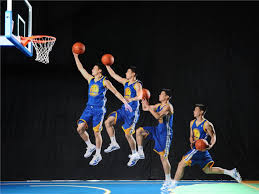

In [112]:
print('layoup_shot')

url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASEhUQEA8PFRUVFRUWFRUVFRUVFhAQFRUWFhUVFRUYHSggGBolGxUVITEhJS0rLi4uFx8zODMsNyotLi0BCgoKDg0OGhAQGy0mICYtLSstLS0tLS0tLS0tLS0tLS8tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAMIBAwMBEQACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQIGAwUHBAj/xABPEAACAQIDBQMJBAQIDAcAAAABAgMAEQQSIQUGMUFREyJhBzJScYGRkrHRFEJyoSNik8EWM1RjgtLT8AgkJUNThJSissPh8TR0g6OztOP/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAQMEAgUG/8QANBEAAgECBAIIBgIDAAMAAAAAAAECAxEEEiExQVETFCJhcYGRoQUyUrHR8ELBM2LhI3Lx/9oADAMBAAIRAxEAPwDmW7MrnaOGBZv/ABkAtc2t268qkg6X/hHSES4OxI/Rz8CR96KoJOO9u/pv8RqSDouALbY2eYMx+24JC0LXIM+H5wueZ07pPMeupepytNDm4nf03+I/WuTsiZ39N/iP1oCXbv6b/EfrQD7Z/Tf4m+tAHbP6b/E31oBdu/pv8TfWgEcQ/pv8R+tAL7Q/pv8AEfrQB27+m/xH60AfaH9N/iP1oB9u/pv8R+tAHbv6b/EfrQC7d/Tf4j9aAYnf03+I/WgH27+m/wATfWgDt39N/iP1oA7Z/Tf4m+tAPtn9N/ib60Au3f03+JvrQB27+m/xN9aAO2f03+JvrQB27+m/xH60Adu/pv8AEfrQB27+m/xH60Au3f03+I/WgDt39N/iP1oA7d/Tf4j9aAO3f03+I/WgDt39N/iP1oC7+SvYi4ragDMR2GbELb7zxSpkB8LsD7KtppXu9iitKcY9jfvLF/hASSNNhu0K91ZFFgRx7NjfX1V3UpwjCMo8TjD1JzbU7acjl2JwUsaxyOjKkqs0bHhIqsUax6hgQRxGnUVS0aU7l48is+XGy6A5sOy68u+huPHu0RzLgc9Xh7K5OyJoCQoB0Ar0BEtQEaAYoB0AUA7UAUAUA6AdAIUA6AKAVAFAOgFQBQCoAoAoAoBUAUB03yIwK+0p0YEqcNMDYkaGaLmNRV1N2TfgUV9UvH+mb/y57LzIJ1ZQIGUFTe7LKEXunwKjToT0sbav+KPmVYf5peRo8LtDDPhcJsnHWSGbD9pBiLd7CYx8TiQHbrGwCg/3Izy3LobXMPku2c8G0cRDJlzwo6PY3GZSQcp5jSiW51Lgc3XgK4LCJoB0AXoAtQEaAdAFAO1AO1AO1AKgCgHQBQDFAFAFAKgCgCgCgAigFQBQBQCoANAFAdU8hI/ynP8A+Xl/+aKrYbPyM9fh5/YsXl0xIXDdnzknht+FI2Y/nlqyr8kfMjDaZ/I5ZvN/F4Ln/iK//YxVUvcsjsXzcdP8qbTb0TJ85f6tSuIf8TkIOgqstImgAUBK1AO1AQoB2oBgUA6EBQBQBQBQDAoAtQkdAFqAKAQFAFAFqAKAVAFAKgCgCgFQDtQH0ZuxuGNkSTY5JZJyYmUxhdcpdXJUDViMvCtNOMW8rdrmSu52vFLQ1O1JdnbcYo7PG6G8cg0MZKqGBQ8UOUA8xYGtdbCSUFbWxVh6mrz6Nmj308nZjjwoGLTMsJgGZGCOyu8qnMpOUESkX180ddPIrVuj1sexhcG694p62ub3dbYkkE+PxLshGLLdjkJJVWMpu6kDgHHAngaqljqcYvstvlp+Sx/DKqkk5JW8fwUPGbnbPhbJLtCYEsFUCEnvOWCAm1vuML/qmuYVqs9cli2WGw8PnmadtlbONyMVi8mQv2vYoUyh8nAsGvmIFrcxyqyLrNXaSKqiwqdouT79D1fwHLllwuMhldSw7NleJnKsy9wsCD3kYakXKmus7XzL3K+hjL/HK/irflFUqwzjtQGO1AMUIHQBQDFAFqAKAKAdAFCQAoB2oAoBWoAoAoAoAIoBGgERQDNAKgEaABQH0W3lj2UCQRi7g2/ihxH9KtfQ/wCy/fIz3fIou+O82yppBjMA88GJvdgYssc3UtY91vHgefWtlCo6ekpJoqqU3L+JuNkb+yyIkZVcyG7IwvmX72Q8uRt1HjVWNwSrQcqe+9uZowOLVGplrbbX5G52fJ202MkmhYSYXDpLAzXCjtA7I0dvOXuDXmQeleLgsHK+etu3a3I9jH/Eko9Fh32bXcub/Bo9v7YdY/tOGDTRrP8ApEOYtEl2DKqsxBaOZW4fckTkc1d1MPG7Rnp4+oorRbf13GDG4ue+IgiigspiKSLApJjmxAVjYgrmVUAIPNT0rmOHinuTUxs58Ev3vFvltmXDYaS7lXneWOILZSUFkZ+6B3LMzA3vmK+21QiuBndWbVmzkaiuiskaAuey9ylMAmmLEkA2BACX5Hq3WvOq4yea0Foe5h/htPInUer9jQ7b2E0CiVTeNmy68VaxIFxxFgfdWqhVc1qefjMKqL7L0NNV5iHQBQDoBUAxQDoB0AChI6AKAVAFAO1AFABFAIigImgCpAGoAqAKAniT32/E3zNSCFqA9GFxjIQQTpw/V9X0rRQxEqb7iqpTU0dX3Q35MkEmFksS8bKBwNyDqhPK51X216TpwrtVI7/c8+8qF4vWP2PD5PJ+2baOHaRlTtPtCgC7K3alGeO4I7QXiK+KLyvXjVF2n4s9SHyrwLJDgkZmiPdWQNDZTZUCsMM8UYuGEYcx5mHEsoU97NXB0cv383gbGYltFEcLPHEBfVAwXMfEhF4dOfE9EFdoQRbhUEnTJ8a4wYxIKmF0BJBXuE90oQdbhgV0vrXlyw8uksj6KnjKfRJyKVtTbJkiWBb5Q+c3v51iABfXma20qbjqzycXXhU0iairzEILfQXudABxJ6ChKVzYtsPFAZjA9uPK9vw3vVKxFJu1zU8DiFHNl0NfarjIFAAoCQoANAMUJHQAaAVAFqAdAFAFqAVqAOdSCNqEBQCoSKgJYg99vxN/xGgIlqARNASWQg3BI9RtUqTWzIsnuXDyfb04bA9qJoZGabKpYOAixKc2UgKWF24kA6cANb8knQNl70YSRlZJVKWGds5R0ZFyqxhuOyiCM4zNpnWIgXsaEnHNulftM+RlZe3lylfNZe0bKV8CLWoQeMGpAiagHRNxsOMds3FYEnvRsGjPoh+8ns7RDf8AFVNTsyUjRT7UHA57NEyMyOpVlJVlPFWBsQfbVyM7VmQoQbrdGSNMXG0o01tfhnIIH76z4pSdJ2Nvw6UViI5v1l72vtOPtUNxowuOFx6q82lC72PoK0rR1epQ975YWxs7QABCwsBwzZFz/wC/mr14fKj5iv8A5Gac12UjoBipAjUAktCR0AUAUAUAUAwKADQAakECKAlQgiRUEiNARoBYnz2/E3zNAY6AKAL0A70AUAXoBigHegLL5PNurhMYrSNaKRTHITwVTqrexgPYTVdSN4llOVpFn8qu6UgY7QhCshVe1A4gjQSeK2y36Wv1tzTlZZWdVEpXkjQ+TjdtcZiC0ihooQC6k2zM18gIGpXuknhwtXVWTitBRgpO72Rn353XMDPPCgSDMqhc2oJA81TxF7+49Kro1M2jO69HL2lsbLdTZcG0cC6aJi4Tl7S5uUJzRs3Uech52F+NJJQlfgdwqSqRs3rzKFj8HJBI0MqFXQ5WU8jx06gixB5gir009UY2mnZmKKMswVRcsQAOrE2A99SDdbd3dlwZVZwjZlzBkY28RcjiK4hUUtiydJw3NNVhURqASWhJKgCgEBQgYFAAoBipAGgEaAVQSFCAtQkiRQEKAMQO+34m+ZoCGWgFloB2oAtQDtQBagHagACgDLQHXPJhvckkQ2fimGZRliLcJYuHZ68WHC3Meqs9WLWqL6Tu+82uF2Rh9nYpVwrorYsqphYO7Ki5iXisDlAubhtLDiLWNeac09G7bvgvH9uWJwi9PQ8m+2yo3TsmD5i3dl0LtIQT2cacWLMUFtABcki2vWGhKU+zw1fJLi33Ja+xOIqRUNTnmy8bJsvGZlYPl7kqgECRSBnUX49Q3AldNKvazxT4PVeHDw8OBmi3B3fmdHx2xNn7ahGJglKyhcub70ZGoSVDxtf3cDVKcoaF7SqalV3d3SxeDx8Uk8CtCjNmlGV0tkNnA85bG2ttK6lUjKNk9TmnSlCabWhdd4cN9pRhHHGe0UojyC4ylWZigI5LqD1tWeOkka5fKziMnHzSvAgHiARccfDWvQPLMYoCYFQSMUAzQAKEDWpAAUAxQCoBGgImoJCpIHQEGqCSNASn89vxN8zUghQgAKEjAoQAFAO1AO1AFqAMtAGWgHqNQSCNQRxBHAg0JOy7Nw82MlTHh1jbKpBNjayC4tfzdTf1+NaMV8Qwnw/DQw1SLk5a6d7v/XsZqdKpWqSqp2Sf2NZjsQ+FxYbFS5x2kbMW7xyBiRlHFQLk2GmgrdJUcV8On1dZbxaXDW3Hny8yu9SnXSm76r7li2nBhNownS8RYrmAs0LjRZE6WuD0YdQa+ZhNpqT05o91wUo2OPt9s2biSoZo5U0upusicj0dDxH7iK29maMV5QZesBv3icThWRAq4kOoLKM14yCcyBgRmuLWN6uwfw6GIqPO+wld629zmvjJQirbvTmb9dqfaZVwcSEZLAyzDMzAeeQjWseB73XzbVXWwEcLh1WqO+ySW127K7/Hqd08W6kujjoaPykbuZYpMQJGYxkF84UkiQkBw9s182UEEkW5CwqmjUbTjLht+P3zLKtOKSlE5bV5mJioJGKAZoQAoAFSCQoBCgHQEaAjzoBCgHQEGqCSN6AnP57fib5mpBChAUAxQDFAFAOgGBQDtQBQCaoexKO87qSBcOgDREBALZiOtxw48B7KzfFKcZ4u08y21sraRSXFPnzOsO5dAkrPf3bKlvjKuIxoBtlPZpde+EF+87Dhpc6cTavf+FUegwqi02220rW8N+BgxMr1L3NFtDeGXB4wrhXvHDaIqdVnKqqyF7c8ykAjhbTib+ZiLVJN2NtKTglZlsxmz4Nt4XtYDkki83NqY3Iu0L24odCD7RzFYlek+41yy1VfiV7ydYZoMXNHiFCMgVWDW084gg8CCLWI4gimOdSeElGlfVra/fy1OMNFRq3lwT38j3b6ydjiVlgcEiNXzKdMxBA4CxuBw6NbhXrfBoyrfDejxEdLtWe9k9PNGDEzy4nPF6nRMdAkuFllkIKtEjdQLWdbe2vBndOSXA9+govJdHMNu7EwsuCmxESqk2HZc2UZRLExC6gaX7wN/Cr8LKTVpMq+IUoqScEUWNCSAASSQAALkk6AADib8q1nmFw2puo2Hwkct2aVspeNkUgZhey6ZiRwPHnVMa15W4GiVBxjfiVGQ3N7AcdALC/qq4zkaEBQEhxqQJqADQCoCLUAGoAVIImhJEioBPEee34m+ZqSDGaAZoBrQkYFCB2oCVqAAKAkF1oB5aAaQliFUEk6ADmTUxi5PKuIbSV2XiQFEsrEd0C4PE86+vcI5UmtjxYyebQ8GFwkbOqsz5SwzEXu2uoXhy51RVTtoy6Mrbo8m/eHjTGypGQSthIQMoafUuVHIar7b86+ZqWzHpx2PDu/tqfByiaBrHgynzZF9Fh8jxFVSipKzO4ycXdHXti7RgxsTYvC2WdAFljJGYKMxCmw1XVyp8WFr6DLPDKaySV1ujZGpF9r1NZtfa2zlZJGg7d2tzBWN14DXusBrwv669Whg8WqWRPLF8HxMVTEUOkva7R68bvE8xhwAjRI8TA0ufNlIyuwKLyLXTXjob8Aaw4nCuleMn42NmFxWaSaRQN8cJLhs8QfuS9lmsLAsoJK25DMFIHjblVdJK53iZzy24Mr2zQRLGwR3yujlUGZiqsCbDrpV72MUd0zseLxEs6JNGvZh7KmdSWDMcoLLbu5bkmvPdrnpp3Vzk28KSLO6SizKza2AMl2J7U24lvOv425V6KTSSPLk7tmtocgakCvUACakBQBQETUACakBQCNARtUEjxHnt+JvmakghzoBmgJLQEgKAZoCVAC0BJaAlQGx2NhS7huS68bXPS/z8K34Cg6lTNwRRiJqMbFguAoTvK175s5IKEWy5QSNDrcdefL3nF5t9ORg0tserYGHjbExdrKcuYaDm33QTbQZrGqcQpZG4vgdQkrpNFc3twjx4ydJGzNnLFrAZi/evble9/aK+drRtPTx/55Howempr4cFI1u6QG4MwKq3qJ0Ps61FCk60nGHDfu8TqbyK8i77h7QGFYq2QB4yLklbyBlI11A569LV60sLajGKWt+BRSqpVHJ7WM+92GjkaLEQrrPcBFUH9Jceao80kkg20uvjVtGq0nGfA5rU1dShszybWx4w+PwId2EeHiVCWB0dw4lYgDS+ZT6rV4+NzTbb46mjDNRa7i0Z9nYto43lwmJkGY5QQcwA4WvqbfKvLtKOp6maE+zuaza+1Y8IJcPgoIoZCRYomoBIDMBbjYgD11owuHjXnefypXeu/Jfkz16rpRUYqzZYnxoWEu4ZbXCR6lmHJpANSx4kG9vXc1mqwhF5IWfPlfu7kX03Jq8ymb6OmJ2dFiSoEsM5iJtY5GDHK3S3d4/vq+i7LKZqyTeZHPbVeZwoC4br7vF8NJiGaVCSezAsFIAFmYEHMCSR7OdZ6lTLKyNNKjmjdla2hh5ww7ZGF1zAlQuZOF7gai5A9tWxknsUyi47niFdnAGgIsagBUgQoBGoAUJCfz2/E3zNSCC0IGKAmtASFAHSgJGgFrQEkoDJGCTYAkmwAHEnoKAtn2UYdBHIjX4nQrmY8SL8QOFfSYLoo0rQkpc7NPU82rnlO7VuR5IsSZpSqDKoW51uLAgcOX/Su4VXOq4rZEuGSF2bfdrDh8Qt3ypEDIxF9RH3u9+roOg1PWq8TNqm/390Jpq8kePdXYcu0HkxLvlGbV3BaznW1j5xAsOg91fN1a0ekvNaclp5d39nqUaTcdDZbxYMQwFXlEn6dMr3N7LG9xYnu6svDqK14XEU6mLWSOVRg7+clb7FdalOFLtO93/TK5Biy+nMX1/WN+Pgf317MKqk7IwuFlc3uxsURiIEUCQl1Y3vZUBDufxAKTaoxNVKDVtWjiELu5rPKJKjYxsikHRmub/pGChrDkBlrx8Uksse777exspO933lZglZGEiMVZTdWHFSOBFZWr6MuTszo2E3kixMQeRhHiEIBtYFzyZb8QenL86xzpSi9NjdCspLXc8m1d6J0nyCy9wkWswQWaxDa5muOPC/Ku6NNSjcqrVpKVjQ7UkdYHjzsVM0YNye+wR2N+tjzrf1WMKSqvduy8DE6zlPLw3K/VJ2MigOjblbQabCLhEVlZQ5DsO4ylyLx+llzC+vE1lqxd2zbRn2VE0++Wz5snbqZJIy7LKbfxPZsRGpt90gl78LnqK7oNWsVYj5inVcZxGpAmFQSIUIGaAiaAVCRzjvN+JvmakgSigBaAmooCYGlAIjWgGw40BICgBRQG93NwCz4tIGuA4YEgE2AGY38CFI/peNQ5qDUmr2ex3CLleKdrlv3swWHhjOFhdjexOZgVjk+7kUCyXYgacQdb1VPEt1VXSSe2ml1yfPuvsaIYeKg4N38Sl7uwO8hVEZ2y3soJPEDl669nC4mnTnKVSSStuzzatKUklFal3n2U2FwGLkteR4hHZeESOR2oDczl1PqFudefU+Jdbm3T0grJd7fH8GlYV0Y9v5nr4I9TYots+D7OCoyrdYxqABZ9etw16wNWk7mxO8FYo28GOZ2ELIU7NmupN7sbanroBrzvWqgujcpc7exmrTzpR5XMuzNlsqCV9FkXueIDEZr+tTp4V7Pw3/yKUs1+FuT3PPxMsrSt3lk2Fs50SbGuAqRwyZQQCJDlOa9xqrC4sNdfDWvE4mMqvR323/eZ3TpNQzcyi4xppmeco7FmJZlViqs2upHD215sqmadm9Xw4miMLLTY8pga3mn/ALVb1era+VnOePM92xo2EyMumVgb9La8uv767o4SVWWWS04kSrdGsy3N1iVGKxkXaWUMRGbcgSbW8btWiWAhh6eWLv4nDxDqyzNWNfvEuUdmdD2jtb9U6qb8xZtDUYproKcV3nFJPpJNmiNeeaTb7oYeOTGQJKFKZmLA8CFRmF/C4FV1W1B5dyylbOrnQtkbx4dXxMkijXJ2SjzjGpZVjXpxB9pNbavwqpGFKnT1eublmerb+3gkimnjVmnOXl4cv78z07EIndsTKUIjA7FE7yws65nvfznsygk+IrHjoLDSjQhdNpuT2zWei/8AW99PW5ow0nWvUlquC5f9KNvfsnDBDiMMjRMjhZ4T5tnvkmh10QsCpXlcWAHHmnPMiKkMrKmTVpUR50BEVAJGgI1II1AJ4jz2/E3zNSCPWgHQE6AlQAONABoCVANaA2+7W1mw02cG2ZDGzWvlViDmHqIFcTjmViynPLIuQ2F9raUdq8bsLwknRpRyc8gRce3wtVMWk7Mvmm02iubkYx8PjVUi2YtDIptx17p8c6rTF0I1qbjLxRVQllmi1b84iVMJmXJaaUxuVU2VLZ8oudCTHYnoLc6rwlLJBQvdJ38y3Eu8s3kYPJttMGKTCtxW7r4o3ne5v+Kra8eIw8tLFY3qw+SYAixZAx05dpIq/wC4q+6rafylFXSRuvJ5jQWbDyqrKqtNGWF+zcFQwF+RuD6x4msmMjWUXKjJq+kknbMuF/AuwuRz7aT5X4G+3n2jHHhZ1kznt1ZEsWPaSgE8zlVVzRm/HQjnUUFKMIRgtb3k3+6k1tZty22Rn2nKkKph4VijiKkPfRTdbENprfWjgpSzS3Tuudy1yyqyKBtzCRxao6MD5oUk3XUE2PQjjwN/CvZw+LlN2d3bf/7/AFuefWoKGqPJhBlYn8JH4SCPdwr1aWkm/Axz1SR7MMpMyM3d/SJp0GYD5Cuq8c0ZNnELaJGTfONFKhZFksEAIbMUAjCsh06rfiePjXlVkuii+9min878CsGsZebbc+323D34dpr6gCa4qaRZZSV5pHUNlbNhnwYjWNbr2i5gecZKhj1uRXlVPiGJw+OzZ3Z208TRKjTdK1uBz/Y+0pRIIgwVC4e+bKAYwb3txVhdbc9La19L8Tw7rSVZbxTXim/yYcHV6NOHBm42lAZmcQgPFNhpBYWJUqQ6EHqsqpp0zdK8en2JWZuqJSjdHO1P51qMYmoBGgJUBGhJEigMk477fib5mpBG1AMChBMCgHQABQDoCd6AKAdAXPcrHvO64QsM41jZjbMF1y+JAGngD0qp0sz0L4VrKzPLvjsw4XaJOoWSQTxsb653DPr1V8w9VutWNWViq/auXLfR0+yYqPgF7F18JBKgAHruR7azUm1I1VleJQtzcUY8bh2ClryKjKBe6SHI1x4Zr+wVpavoZE2ti3+V7ZTKYcSidyzRsVGid8vHe3C+ZhfqPGutOAZQtm7QaCVZVv3TqPSU+cvtFcyV1YmMsrudIxmBixOHOFDD9KvaYd7+ZNkuhHg2oPr8KzwlldjRUinG6PPvTixJgUkAFnVSPU6gn99cxjadjuo+xc5rPKSdTc2A6WXgAOn/AHrdTn0askYpdp3ZsoGLR5uanKfFLA29mnur2cPVdSlmttoZJxUZ25m62MM+JhAJHezE66BQWJsPUatxL/8AGyumrM1m+ahZyoa4IVyLWyuyIHGuvnKTblevHru0Yx8WaqWrb8iv2rMWm23RkRMZEZALEsBfgGZSB+Zt7arqpuLsXUGlNXLrsiXLHJDC2vfHaRs1gJL2B5O4UjU3A61gq9mUZvXbRrl7npUsOqyavZLl3nkwe70TpLHhpCuK7NkRJMrLIoHeEZsMjGxF9eXU39Kn8RlW+dehkxPw9UVeBl8mbpDhpMTIRlRpGYH/ADaCPLa3Isc1Uz+dHFP/ABu5zJRoPUKuMwMfzoBUA0oCJoBUBmn85vxN8zUggKEDFASvQDFASoBUBMcqAkRQARQG03Tw5kxmHRTICZUsYwCylTmzC5AsLXPgDQHZd7dr4NYnTFRo6CwbNYqtxcEc8+mgGul9BqLVC2rIza2RVvKjCYYBcg9tKgtrfJGjuf8AeyVnjTyu5fUq5lYyblbsjBBsbiXjMoS8UaSXVVZTcysLC5vbU5Ra9+l6gyhyMe1N+ITE8M7piBIpVo4kYKin0ZWsCb6hgDawrqThwIWbicxPGqjov+4qyTxxWF+wmRTqNI2N1J97D+jVTptvQuVRKOptINis2xbPEe0hTEE3zBv0LS5SF53A/OrFCK1K3J2scrHXqQT79KHJusJEViVhZlY6lTfLJ6Djipt148r16nw/E07OltLfXj4c0UV6UtJcDfbm4B2nvbKFUgZgNe0/RiwbQ2zUxWIgn0Sd3v5IiNKWXPbQrG8eIMmJmYgD9IwsNALGxAHrBrz6sry07vsW01ZGsNVnZ6dlsyzI6gnKwJt6N+9Y8jYn22rqFGVV5Y7kqag1JlxiwMuAV+0eNQxVlJYgh2FsjqRo+UKcovYHWqcZhG8rgtlr/wA7jfgcbGnmjN7u6NXiWkdlkjmKtmJVkN3vc6qMw+YqjD4eblZRdy3F4uLjozwbb3hMsSYaMARghpHyhXxUoUAPJbja3P11oUbas86U76GgrorERQkQNAA0NARNAK9AZ5/Ob8TfM1JBGgAUA6AkKAlQC5UBMUBO1ABoCy7hbZwuEmefERuzhLQkahGOYOT4lSAD4t1rpW4gsOzpW23jgZEdcPh1z2BUDMSLCQa3zZbWB0CHXjdJ3CRuPKpEk2EE1+/BKB+ISWV7LfrlOutlNS4tK5Clc5M8jMApZiAbgEkgeocq5JI86ATUB3Dyc7O2dDhPtadoRKqB+1NgZIiwJVTb7xbw058a7itdGcy21Nht7eXCxuAZsNZwe0QugJW9r2Zl0IBHPga6yriyMz4HAsWihmCkEBmseqhrL+VqqZ2ZcDjZIX7SNrEcuIYDWzA6EaCq504zVmdwm4O6OwYacOUlQd4hWBudVy5gBa3F8vHSwNYcPTjQctG76LuNeIcqij6nGJ5Wcs7Wu5LHl3mNzpy1NeglZWMTepm2RgGxEyQJxdrX6CxJPuBrirUVODk+B1CGeWU6hszd7CYCEzzPdkszMeMb8kRf9IT11W19CRWiniakYfLlT2XF97/COalKOayd2uPBeBzfbO2pMS+aR2sCciX7sak3sB16nia1qSWhnszyYHEKkga1yOGmY39Vxf3iuqVVQnc5lTcomTbsQz9qAwEt2syhSHv3tALW1B061RioJSzJWTLKL7NnwNWayFwjQESKAZ+VARNARtQHpn85vxN8zUkEKAKAYoCQoBmgHQDFAToBNQAKAvewN8sNh8F9kWB1c3MsmXN2rHiws6m/AC5AAFXUpRhJSdzmSbVivbwbckxUlzmEanuISNCfOkawALsSST42ueJ4nPM7kxVlY1N+dckiAoCcajMMxIW4zEcQt9SL87UB0Xb+9WCEcMOFzGGFQBH3v0g0srKy2HAd8ktqbA8a0U5whFp6t+xXKLk1Y5/isQ8jtLIxZmJYnxPIdAOAHIAVnLDzt09/yqASAoSdM3H2h/id/vwtlB8BZk9lmt7KzVVaVzVTd46lK3vwqR4p+z8yS0qD0RJqy+x849QFXxldXM0lZ2Lj5Ptmxw4f7YygO+bvE+bGGsAOlyt7+qs1aTbsaqMVGNzybw73xvmRXUlVceYShNrW9ep1H/Ss8MLU6SMnJ5U1bXbwHWIqMlFK/wBygNKL8L+J4mvcliLyPOVN23PVs7CGV7DQDVmH3V8OpPIVFbEqirpXb2X77iFNz04cTbYrCzvhykeEZlZv0axwtJICrd6WSUAsDoUAuAczaWFedHEVKk+1J83y7kl9zc6MIQzJavbn3tldxmAmhsJoJor8O0jeO/qzAXrQZ9jzEUAr8udARoAIoCNAeifzm/E3zNSQQFAF6AkKAkKAkKAKAlQDoBgVIGaAVqAlQAaAkKAYFAO1AJqAWT5i/voDLy5VALT5PizSSwKCc0ecDxQgH/jHuqupFtaFtOdtzwb24KT7WsJHeZIVUcbFxoNPEmpinGOpw7SeheNtskGDEKcEQID4Aak+wX9tZfmkapvLGxyRup51tMZAihJud39sLF3Jb5LkggXsx43HE+uqalLM8y3JzaWLHht7sKhJGc36odNSf31S6MyxVmuBlbfbDm6s94286Noi6nxKspFdKnUWxLq33Ru8Hsfd7HOOy7EPp3I3eHOB/NHL+QrXoZ1LmYN891o5k7DCKiHDo7pGBbMSLMF1tqUTvHr667mrxT8jiMu1Y5Deqi0LUAtKA277FlLNYr5x5SdT+pV/V6nL3RV0sf1Mmu70/wCr8Mv9nTq9Tu9UOmh3+jMi7tT9B8M39nTq8+71Q6aHf6M9WH3Sci7SlTe2XsJmuOtwo/uKnq8+a9UR08e/0Z6RueP5Q/8Ass1Ory7vVEdPHk/RmD+CkvpH9lL/AFadXlzXqh08eT9GZYd0XPnSSL0tBI1/zFqdBLmvVDp48n6M9I3LH8on/wBkb+0p0D5r1Q6ePJ+hOPcwHjNOP9VJv7O0FOgfNepHTx5P0G+5luE05/1XL/zTU9A/qXqOsLk/QwrudLcd57cz2ZuP6ObX3inV39S9SOsLkzZwbhwkd/GzjwGD/wD3rnoJc16/8J6ePJmCXchQe7iJ2HU4YLb/AN43/Kuurvmv3yIeJXJ+wm3KHKaY/wDoKP8Am1PVn9S9yOtL6X7EBuY1/Pe3Xsxf3Z6dWf1L3I60vpfsZxuWv+mm/YL8+2qerP6l7jrS+l+xF9yz92Rz641X5SGnVnzXv+CetLk/b8gNy2PnSsPVGp/5gqOrPmvf8EdaXJ+35IybktcZZ306wIdelu2qeqy5r3/A62vpft+Rpua5vmnb2Qp++ao6s+a9/wAE9aj9L9izbg7pmHEnEdrmCo6lciqe+BY3Dt0OlcyouPH7/g7hWU09PsWbH7lwT4lcZnKvCLEaZWKhipOvEZvyFVTpt6cy2nUivIqG9GxpZmMfbBV1uVCNm6DWRbCpp4KW917ldXGxb2fsVttyH/lA/Zx/29XLCy5r3/BX1uHJ+35BdxzbWc38Ei09X6fvflUPDS5r3/AWKi+D9vyQ/gFiDezMRyIjTUeI7bT3modBfUvc6Ve/8X7GFtxcTbuhyemRLe8Sn5VHQW/kvf8AA6wvpfsJdwcYR/FTn1RA21HD9J3tPV6+vLhFfzidKt3P2MTbkY1WBEOLFiDmENmUjgRaTiNOYpkjwnH1HTLk/YvW6WMxKsI8bFiGaxEeIeAoUOpyuVLCx4X00Ot6hyy8U/MhOPDQqG29ypjPI6fxbMSp7x48STrqTc+2sMsUou1mboUM0b5kax90J/SX3N9Kjra+lk9X/wBl6kP4JT+knub6U63Hkx1d/UjfNhHue+/E/ebrX1qpQ5I+ZliJc2MYFvSPvNT0cOSK+sS5mRdn+v31PRx5HLry5meLA2N8qnwIuPdR001YKvJO56hCP9FB+zH7646Fc36k9YlyXoZFh/m4P2SfSp6Jd/qR1iXJehMQ/wA3D+yj/q06Jd/qznpnyXojIsX83D+xi/q06Jd/qx0z5L0RkWP+ag/ZJ+4VHRLm/Ujp2uC9DJlXnBAf6LD5MKnof9n++Q6x/qv3zMixRfyaH2GUfN6dFL6n6L8Dp48Yr1f5Miw4bnA4/DL/AFkNc5Kq2kvNfhkqrSe8X5P/AIehNnYQ/wCdlQ/rIHA9ZUg/lXLddfxT8NPudpUJfya8Vf7GbF7sOidsuSSP00N7DxBFxVdPG0pTyPR3tZ8zurg6kYZ1qt9DXDBr/e1brGLMTXCrSwzEvsy/3FLDMH2cUsRmY+wXnSwzMkYlpYm7LVggiQrHEzsDq1yFUlrXFgcwtbTgNeNeZNXqOUl+fwexSeWmoxd/sbiKDOtkeMrwbKc3sJ5m1YXWs7OLvvqanFW3Vu4gm7uEBJ7BSSbksS1yfAm1cvFVn/L00KHSpLaK89SabEwg4YeH2qD86h4iq95P1OejhwSPZHCqiyhVHQAAflVTd9zrXmSKjrUWRy433ZEoKWOXBEGjHhUWOHBGNoV8K5scuKPPJhVPIVBxax5JMEOQArlxT3LKdWcH2Wa/E7OQ+cg9Y0/K1qrySj8r9TSq8J/5I+a0Nc2w478vcf3Uzz+k66Kk9VP2KoyC50HGvsrnkySuSRB0Huro4sjMEHQe6hFkSyDoPdQiyJKo6CoCSJKg6CouTZEwg6CpuyLIbKOgqLhpGF6i7CiiN6lNnWVcjPGo6ClzhpGdBU3IsjLEO8PWKrm2ovwLaaWZFx3v7mFRU7oJAIXQEdLCvn8F2sRG/e/M9zG9nDtLuKPevpLs+ecUSSl2LIkQKXZNkQpdhJEqXJsgqL6iyLQ4vFCTxyrrztfrWKD7UvE3T+WJZNlRKIgQqg66gDqa8XEtuo/E9ekl0a8DORrUGVrUYoEI0JFQ5EaEMhaoK7ETQgxvXJWzA9QcHnkodWMJFCD/2Q=='
Image(url = url)

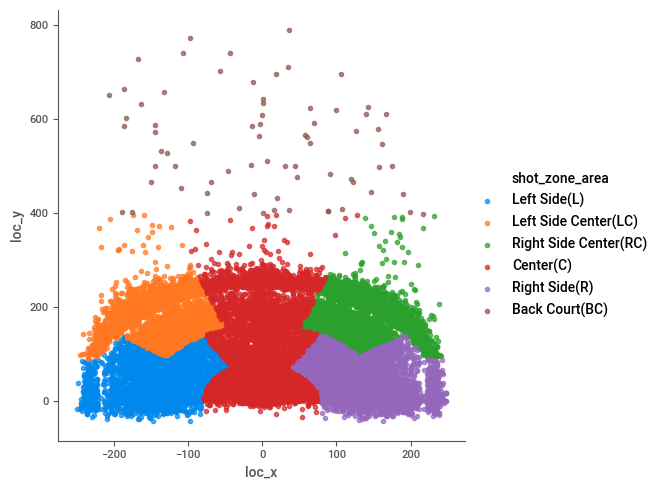

In [92]:
g = sns.FacetGrid(df_EDA,hue='shot_zone_area',height=5)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)

g.add_legend();


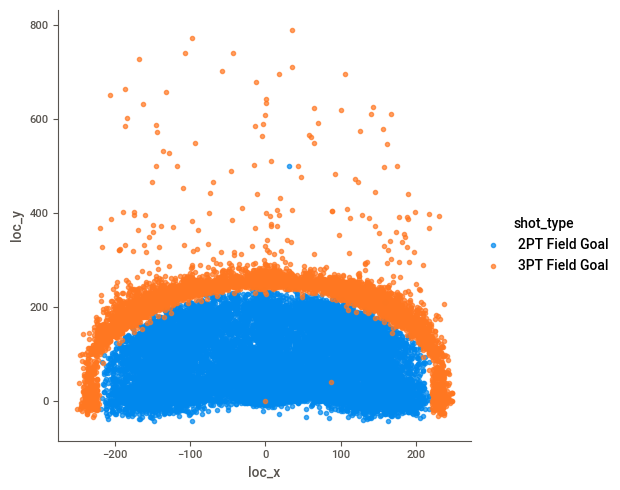

In [93]:
g = sns.FacetGrid(df_EDA,hue='shot_type',height=5)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)
g.add_legend();


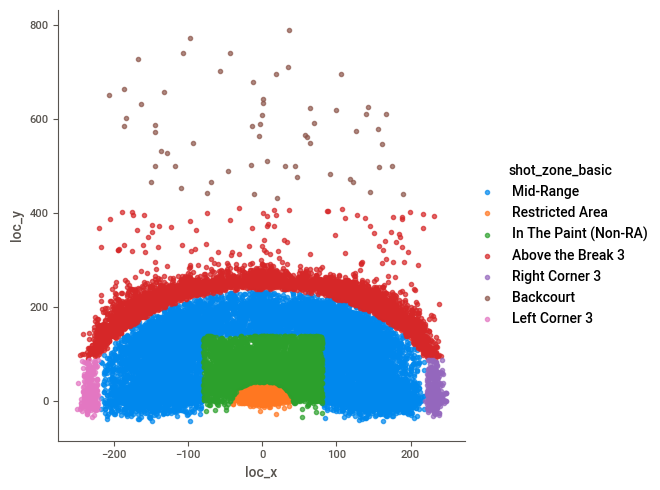

In [78]:
g = sns.FacetGrid(df_EDA,hue='shot_zone_basic',height=5)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)

g.add_legend();

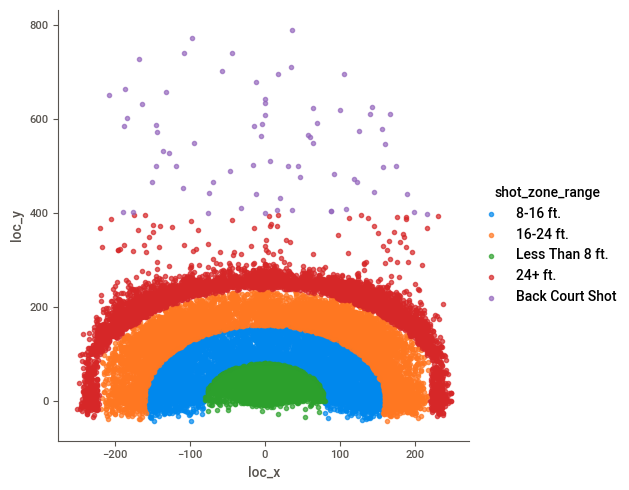

In [81]:
g = sns.FacetGrid(df_EDA,hue='shot_zone_range',height=5)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)

g.add_legend();

### avaliando missings

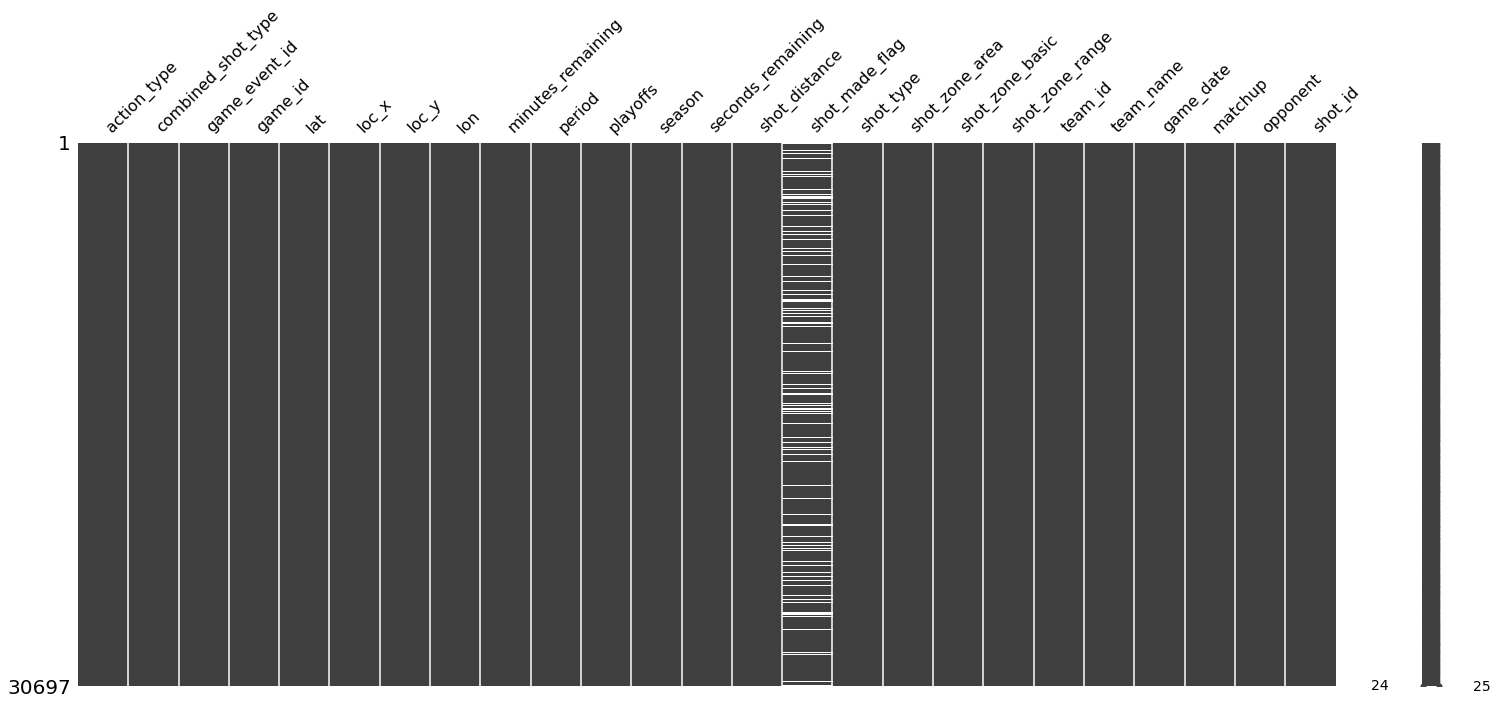

In [3]:
import missingno as msno

msno.matrix(df);

os missings sao inclusive quem queremos preditar.. vou tirar aqui pra nao atrapalhar as analises..
lembrando que na parte do prep precisa executar tanto no treino quanto no teste

### retirando amostras sem flag

In [4]:
df_EDA = df[~df.shot_id.isin(sample_submission.shot_id)]

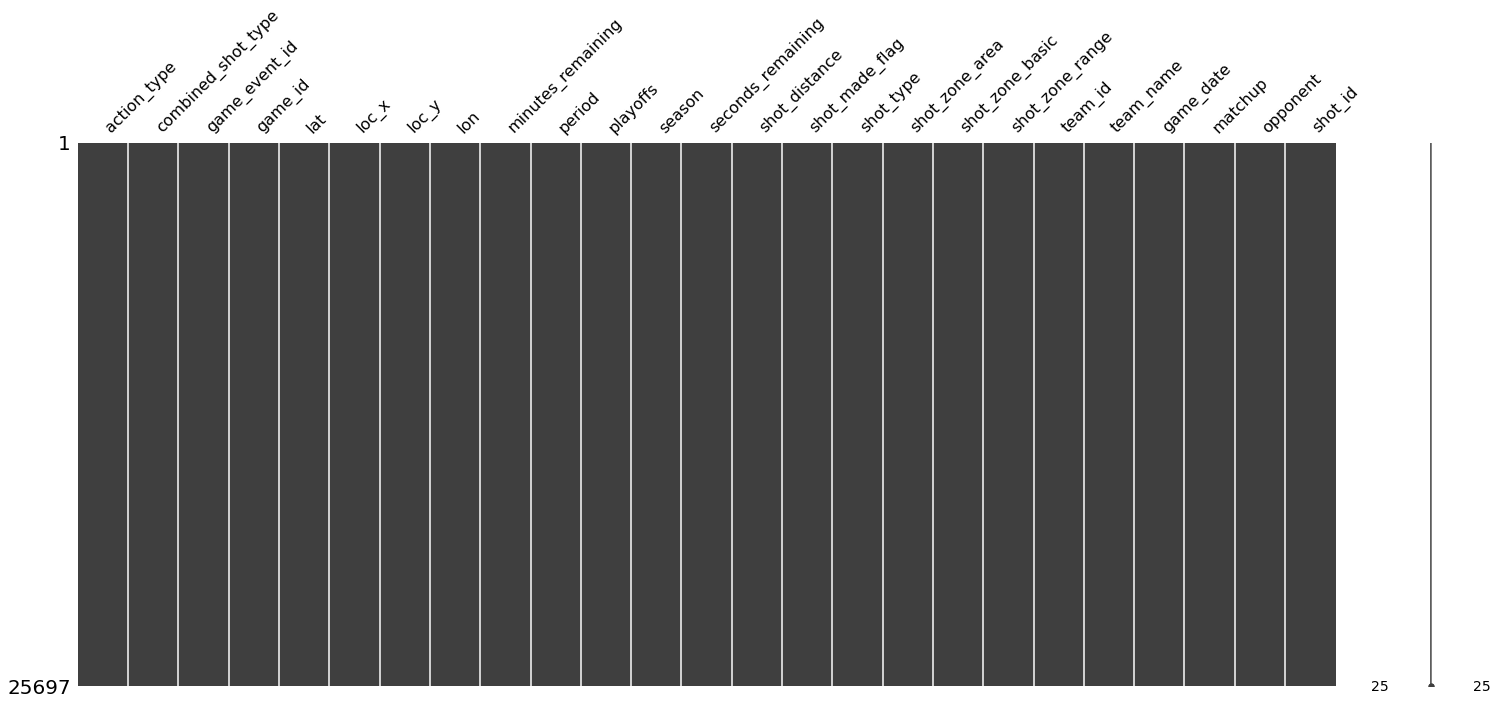

In [5]:
msno.matrix(df_EDA);

### ajustando e criando algumas variaveis

In [6]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [7]:
df_EDA.head()

action_type combined_shot_type  game_event_id   game_id   lat  loc_x  \
1          Jump Shot          Jump Shot             12  20000012 34.04   -157   
2          Jump Shot          Jump Shot             35  20000012 33.91   -101   
3          Jump Shot          Jump Shot             43  20000012 33.87    138   
4  Driving Dunk Shot               Dunk            155  20000012 34.04      0   
5          Jump Shot          Jump Shot            244  20000012 34.06   -145   

   loc_y     lon  minutes_remaining  period  playoffs   season  \
1      0 -118.43                 10       1         0  2000-01   
2    135 -118.37                  7       1         0  2000-01   
3    175 -118.13                  6       1         0  2000-01   
4      0 -118.27                  6       2         0  2000-01   
5    -11 -118.41                  9       3         0  2000-01   

   seconds_remaining  shot_distance  shot_made_flag       shot_type  \
1                 22             15            0.00  2PT Field Goal   
2                 45             16            1.00  2PT Field Goal   
3                 52             22            0.00  2PT Field Goal   
4                 19              0            1.00  2PT Field Goal   
5                 32             14            0.00  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   
5           Left Side(L)        Mid-Range         8-16 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  
5  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        6

season e game_date sao campos de datas, vamos ajustar

In [8]:
df_EDA.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

o formato ta bem zuado, vou dropar essa info e trabalhar com o game_date

In [9]:
df_EDA.drop('season', axis=1,inplace=True)

In [10]:
df_EDA.game_date.unique()

array(['2000-10-31', '2000-11-01', '2000-11-04', ..., '2000-06-14',
       '2000-06-16', '2000-06-19'], dtype=object)

In [11]:
pd.to_datetime(df_EDA.game_date, format='%Y-%m-%d')

1       2000-10-31
2       2000-10-31
3       2000-10-31
4       2000-10-31
5       2000-10-31
           ...    
30691   2000-06-19
30692   2000-06-19
30694   2000-06-19
30695   2000-06-19
30696   2000-06-19
Name: game_date, Length: 25697, dtype: datetime64[ns]

In [12]:
df_EDA['game_date'] = pd.to_datetime(df_EDA.game_date, format='%Y-%m-%d')

In [13]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 24 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name             25697 non-null object
game_date         

vou criar a feature year e month pra avaliar se influencia no jogo dele

In [14]:
df_EDA['year'] = df_EDA.game_date.apply(lambda x: x.strftime("%Y")).astype(int)
df_EDA['month'] = df_EDA.game_date.apply(lambda x: x.strftime("%m")).astype(int)

In [15]:
df_EDA.head()

action_type combined_shot_type  game_event_id   game_id   lat  loc_x  \
1          Jump Shot          Jump Shot             12  20000012 34.04   -157   
2          Jump Shot          Jump Shot             35  20000012 33.91   -101   
3          Jump Shot          Jump Shot             43  20000012 33.87    138   
4  Driving Dunk Shot               Dunk            155  20000012 34.04      0   
5          Jump Shot          Jump Shot            244  20000012 34.06   -145   

   loc_y     lon  minutes_remaining  period  playoffs  seconds_remaining  \
1      0 -118.43                 10       1         0                 22   
2    135 -118.37                  7       1         0                 45   
3    175 -118.13                  6       1         0                 52   
4      0 -118.27                  6       2         0                 19   
5    -11 -118.41                  9       3         0                 32   

   shot_distance  shot_made_flag       shot_type         shot_zone_area  \
1             15            0.00  2PT Field Goal           Left Side(L)   
2             16            1.00  2PT Field Goal   Left Side Center(LC)   
3             22            0.00  2PT Field Goal  Right Side Center(RC)   
4              0            1.00  2PT Field Goal              Center(C)   
5             14            0.00  2PT Field Goal           Left Side(L)   

   shot_zone_basic  shot_zone_range     team_id           team_name  \
1        Mid-Range         8-16 ft.  1610612747  Los Angeles Lakers   
2        Mid-Range        16-24 ft.  1610612747  Los Angeles Lakers   
3        Mid-Range        16-24 ft.  1610612747  Los Angeles Lakers   
4  Restricted Area  Less Than 8 ft.  1610612747  Los Angeles Lakers   
5        Mid-Range         8-16 ft.  1610612747  Los Angeles Lakers   

   game_date    matchup opponent  shot_id  year  month  
1 2000-10-31  LAL @ POR      POR        2  2000     10  
2 2000-10-31  LAL @ POR      POR        3  2000     10  
3 2000-10-31  LAL @ POR      POR        4  2000     10  
4 2000-10-31  LAL @ POR      POR        5  2000     10  
5 2000-10-31  LAL @ POR      POR        6  2000     10

In [16]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 26 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name             25697 non-null object
game_date         

ajustar o campo de segundos

In [17]:
df_EDA['seconds_remaining']=60 * df_EDA['minutes_remaining'] + df_EDA['seconds_remaining']

In [18]:
df_EDA['last_5_sec_in_period'] = df_EDA['seconds_remaining'] < 5

In [19]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 27 columns):
action_type             25697 non-null object
combined_shot_type      25697 non-null object
game_event_id           25697 non-null int64
game_id                 25697 non-null int64
lat                     25697 non-null float64
loc_x                   25697 non-null int64
loc_y                   25697 non-null int64
lon                     25697 non-null float64
minutes_remaining       25697 non-null int64
period                  25697 non-null int64
playoffs                25697 non-null int64
seconds_remaining       25697 non-null int64
shot_distance           25697 non-null int64
shot_made_flag          25697 non-null float64
shot_type               25697 non-null object
shot_zone_area          25697 non-null object
shot_zone_basic         25697 non-null object
shot_zone_range         25697 non-null object
team_id                 25697 non-null int64
team_name               

### separando tipos de variaveis

importante para analisarmos de forma diferente

In [20]:
dfn = df_EDA.select_dtypes(exclude=['object','bool'])
dfn.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'team_id', 'game_date', 'shot_id',
       'year', 'month'],
      dtype='object')

In [21]:
dfs = df_EDA.select_dtypes(include=['object','bool'])
dfs.columns

Index(['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup',
       'opponent', 'last_5_sec_in_period'],
      dtype='object')

### analisando as numericas

In [22]:
dfn.describe()

game_event_id       game_id       lat     loc_x     loc_y       lon  \
count      25,697.00     25,697.00 25,697.00 25,697.00 25,697.00 25,697.00   
mean          249.35 24,741,090.78     33.95      7.15     91.26   -118.26   
std           149.78  7,738,107.84      0.09    110.07     88.15      0.11   
min             2.00 20,000,012.00     33.25   -250.00    -44.00   -118.52   
25%           111.00 20,500,064.00     33.88    -67.00      4.00   -118.34   
50%           253.00 20,900,337.00     33.97      0.00     74.00   -118.27   
75%           367.00 29,600,270.00     34.04     94.00    160.00   -118.18   
max           653.00 49,900,088.00     34.09    248.00    791.00   -118.02   

       minutes_remaining    period  playoffs  seconds_remaining  \
count          25,697.00 25,697.00 25,697.00          25,697.00   
mean                4.89      2.52      0.15             321.52   
std                 3.45      1.15      0.35             208.31   
min                 0.00      1.00      0.00               0.00   
25%                 2.00      1.00      0.00             141.00   
50%                 5.00      3.00      0.00             304.00   
75%                 8.00      3.00      0.00             499.00   
max                11.00      7.00      1.00             714.00   

       shot_distance  shot_made_flag          team_id   shot_id      year  \
count      25,697.00       25,697.00        25,697.00 25,697.00 25,697.00   
mean           13.46            0.45 1,610,612,747.00 15,328.17  2,006.12   
std             9.39            0.50             0.00  8,860.46      4.83   
min             0.00            0.00 1,610,612,747.00      2.00  1,996.00   
25%             5.00            0.00 1,610,612,747.00  7,646.00  2,002.00   
50%            15.00            0.00 1,610,612,747.00 15,336.00  2,006.00   
75%            21.00            1.00 1,610,612,747.00 22,976.00  2,010.00   
max            79.00            1.00 1,610,612,747.00 30,697.00  2,016.00   

          month  
count 25,697.00  
mean       5.57  
std        4.15  
min        1.00  
25%        2.00  
50%        4.00  
75%       11.00  
max       12.00

### descartando variaveis que nao fazem sentido

In [23]:
dfn=dfn.drop(['game_event_id','game_id','team_id','shot_id','game_date'],axis=1)

essas variaveis nao vao ajudar

### analisando outliers

In [24]:
dfn.describe()

lat     loc_x     loc_y       lon  minutes_remaining    period  \
count 25,697.00 25,697.00 25,697.00 25,697.00          25,697.00 25,697.00   
mean      33.95      7.15     91.26   -118.26               4.89      2.52   
std        0.09    110.07     88.15      0.11               3.45      1.15   
min       33.25   -250.00    -44.00   -118.52               0.00      1.00   
25%       33.88    -67.00      4.00   -118.34               2.00      1.00   
50%       33.97      0.00     74.00   -118.27               5.00      3.00   
75%       34.04     94.00    160.00   -118.18               8.00      3.00   
max       34.09    248.00    791.00   -118.02              11.00      7.00   

       playoffs  seconds_remaining  shot_distance  shot_made_flag      year  \
count 25,697.00          25,697.00      25,697.00       25,697.00 25,697.00   
mean       0.15             321.52          13.46            0.45  2,006.12   
std        0.35             208.31           9.39            0.50      4.83   
min        0.00               0.00           0.00            0.00  1,996.00   
25%        0.00             141.00           5.00            0.00  2,002.00   
50%        0.00             304.00          15.00            0.00  2,006.00   
75%        0.00             499.00          21.00            1.00  2,010.00   
max        1.00             714.00          79.00            1.00  2,016.00   

          month  
count 25,697.00  
mean       5.57  
std        4.15  
min        1.00  
25%        2.00  
50%        4.00  
75%       11.00  
max       12.00

In [25]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

In [26]:
varx='loc_y'
A=[]
A.append(pd.DataFrame(detect_outliers(dfn[varx]).value_counts(normalize=True)))

In [27]:
A.append(pd.DataFrame(detect_outliers(dfn[varx]).value_counts(normalize=True)))

In [28]:
pd.concat(A,axis=1)

loc_y  loc_y
False   0.99   0.99
True    0.01   0.01

In [29]:
A=[]
for varx in dfn.columns:
    A.append(pd.DataFrame(detect_outliers(dfn[varx]).value_counts(normalize=True)))
a = pd.concat(A,axis=1).fillna(0)
a

lat  loc_x  loc_y  lon  minutes_remaining  period  playoffs  \
False 0.99   1.00   0.99 1.00               1.00    1.00      0.85   
True  0.01   0.00   0.01 0.00               0.00    0.00      0.15   

       seconds_remaining  shot_distance  shot_made_flag  year  month  
False               1.00           1.00            1.00  1.00   1.00  
True                0.00           0.00            0.00  0.00   0.00

aparentemente nenhuma variavel apresenta mtos outliers
(boxplots tb sao legais aqui)

### analisando as distribuicoes das variaveis

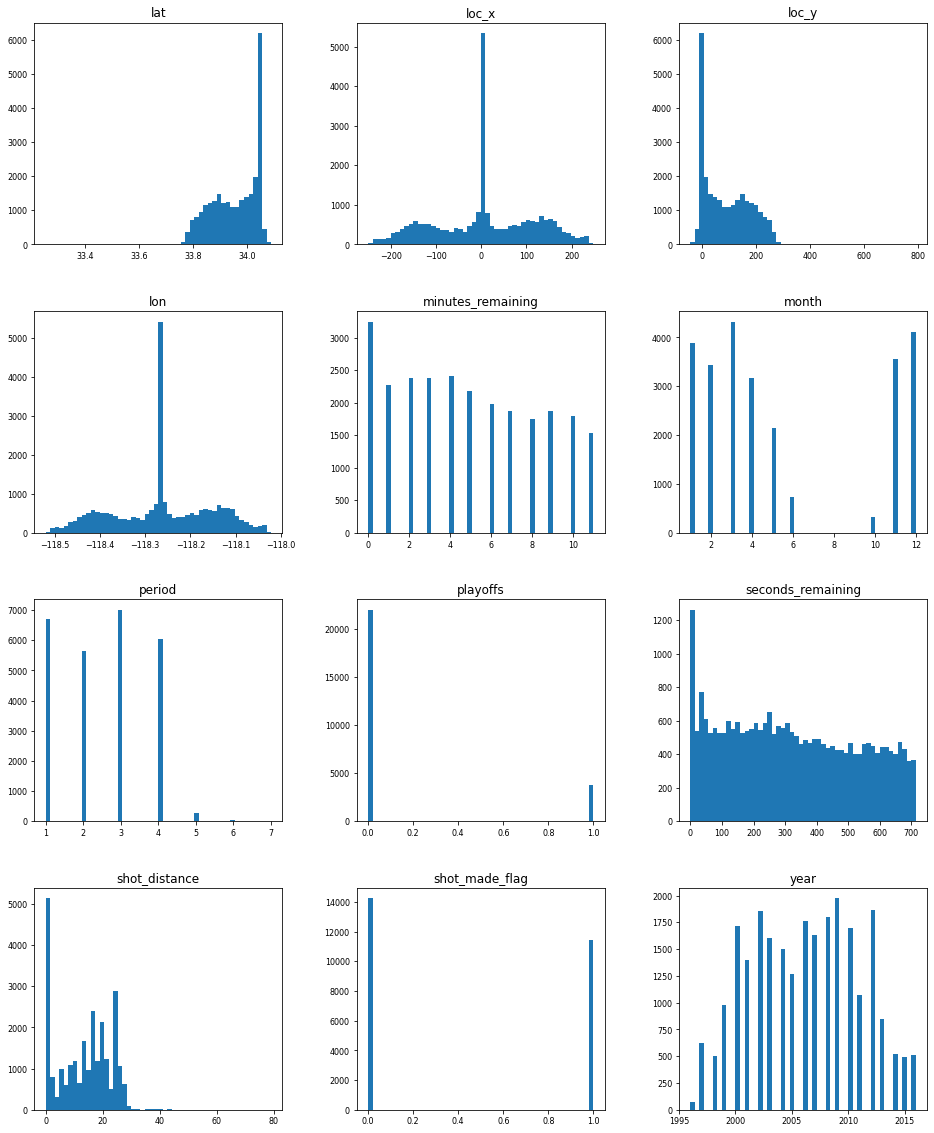

In [30]:
dfn.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, grid= False);

Insights!

1. picos em loc_x e loc_y, que sao as coordenadas da quadra. No (0,0) seria debaixo da cesta?
2. picos em Lon, sao bem parecidos com loc_x, estariam correlacionados?
3. picos em seconds e minutes_ remaining, seria ele o resposavel em sempre tentar aquela ultima cesta do periodo?
4. picos em shot_distance, ele arremessa mais de longe e enterrada
2. playoff eh uma variavel boolean

### zoom nas distribuicoes

****************************************************************************************************
analise da variavel shot_distance


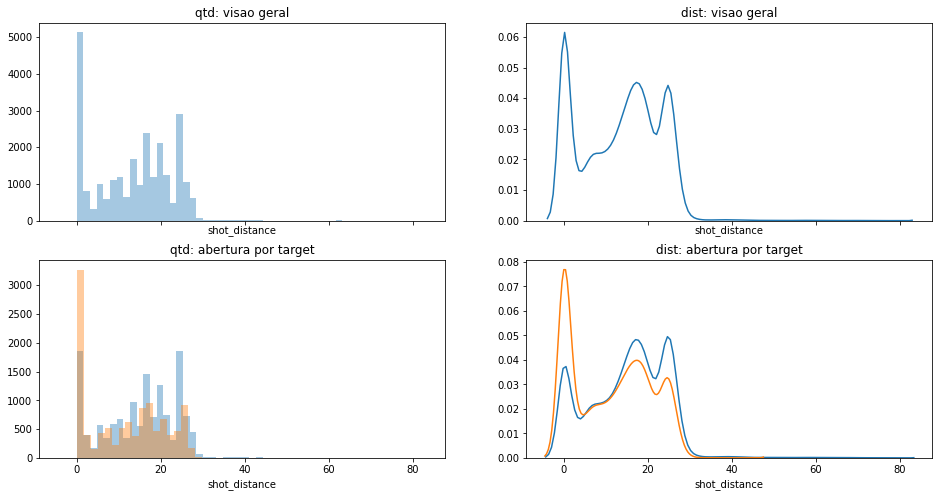

In [31]:
varx = 'shot_distance'
vary = 'shot_made_flag'

print('*'*100)
print('analise da variavel ' + varx)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=True)


sns.distplot(dfn[varx], kde=False, ax=ax[0,0]).set_title('qtd: visao geral')
sns.distplot(dfn[dfn[vary]==0][varx], kde=False, ax=ax[1,0])
sns.distplot(dfn[dfn[vary]==1][varx], kde=False, ax=ax[1,0]).set_title('qtd: abertura por target');

sns.distplot(dfn[varx], hist=False, kde=True, ax=ax[0,1]).set_title('dist: visao geral')
sns.distplot(dfn[dfn[vary]==0][varx], hist=False, kde=True, ax=ax[1,1])
sns.distplot(dfn[dfn[vary]==1][varx], hist=False, kde=True, ax=ax[1,1]).set_title('dist: abertura por target');


In [32]:
import plotly.graph_objects as go

varx = 'shot_distance'
vary = 'shot_made_flag'

x0 = df_EDA[df_EDA.shot_made_flag==0][varx]
x1 = df_EDA[df_EDA.shot_made_flag==1][varx]

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

### comparando histogramas

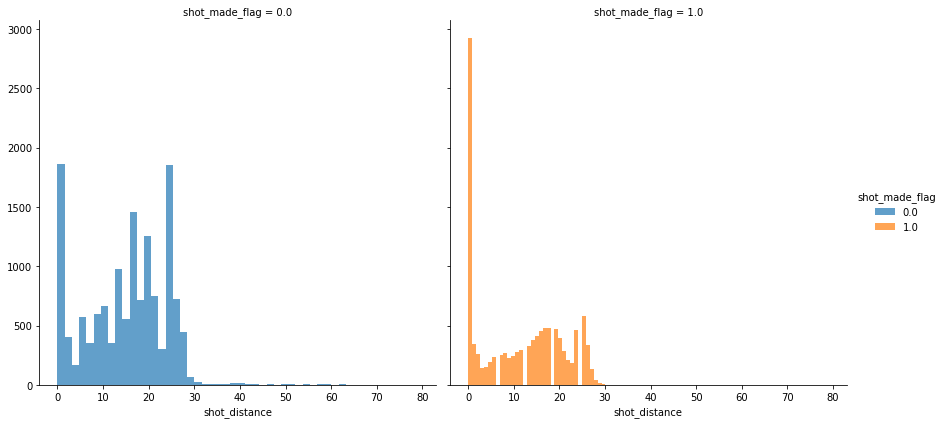

In [33]:
varx = 'shot_distance'
vary = 'shot_made_flag'

g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag' ,height=6)
g.map(plt.hist, varx ,alpha=.7, bins=50)
g.add_legend();

### para varias features

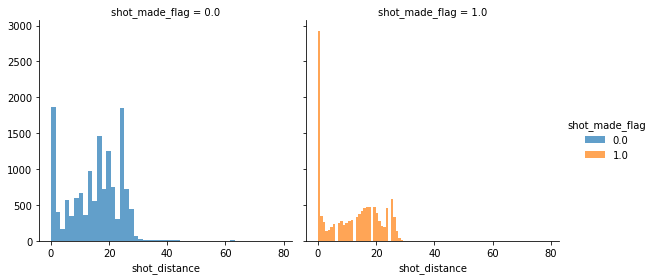

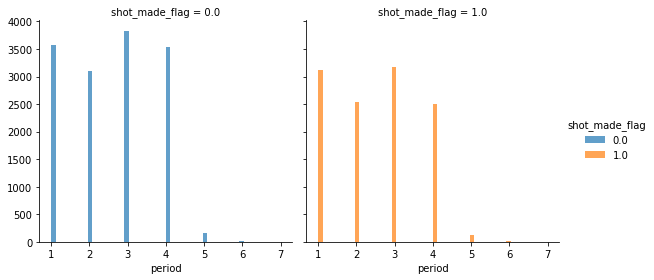

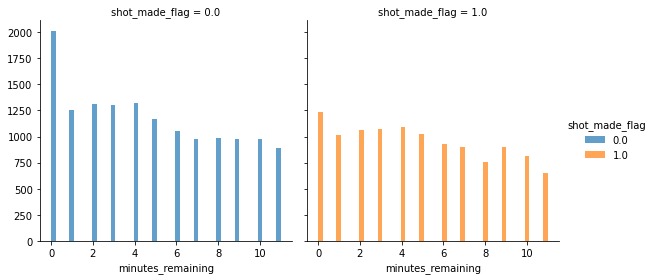

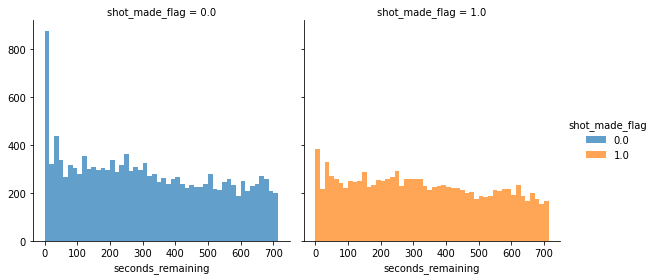

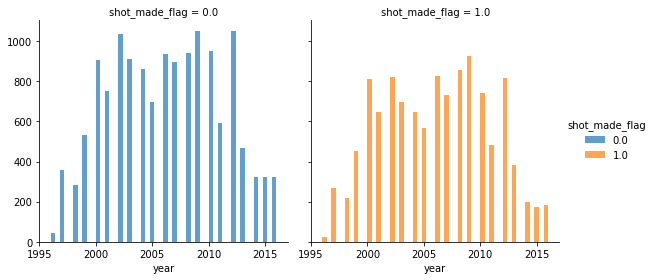

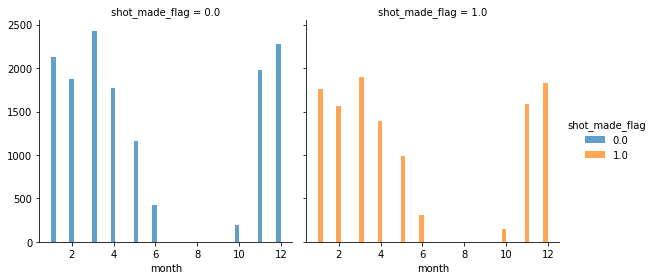

In [34]:
vary = 'shot_made_flag'

lista_var = ['shot_distance', 'period',
       'minutes_remaining','seconds_remaining',
        'year', 'month']

for varx in lista_var:
    g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag' ,height=4)
    g.map(plt.hist, varx ,alpha=.7, bins=50)
    g.add_legend();

### incluindo %conversao [shot_distance]

In [35]:
import plotly.graph_objects as go

varx = 'shot_distance'
vary = 'shot_made_flag'


cs = pd.crosstab(index=dfn[varx], columns=[dfn[vary]], margins=True).reset_index()
cs['ipp'] = cs[1.0] / cs['All']

ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


cs.drop(cs.tail(1).index,inplace=True)


cs['ipp_mean'] = ipp_mean


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=cs[varx], y=cs.All, name="elementos"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="conversao e qtd de elementros por " + str(varx)
)

# Set x-axis title
fig.update_xaxes(title_text= varx)

# Set y-axes titles
fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

fig.show()

### % conversao [geralzao]

In [36]:
import plotly.graph_objects as go

vary = 'shot_made_flag'

lista_var = ['shot_distance', 'period',
       'minutes_remaining','seconds_remaining',
       'year', 'month']

for i in lista_var:
    
    varx = i
    
    cs = pd.crosstab(index=dfn[varx], columns=[dfn[vary]], margins=True).reset_index()
    cs['ipp'] = cs[1.0] / cs['All']

    ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


    cs.drop(cs.tail(1).index,inplace=True)


    cs['ipp_mean'] = ipp_mean


    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(x=cs[varx], y=cs.All, name="elementos"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
        secondary_y=True,
    )


    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
        secondary_y=True,
    )


    # Add figure title
    fig.update_layout(
        title_text="conversao e qtd de elementros por " + str(varx)
    )

    # Set x-axis title
    fig.update_xaxes(title_text= varx)

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
    fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

    fig.show()

### analise por boxplot

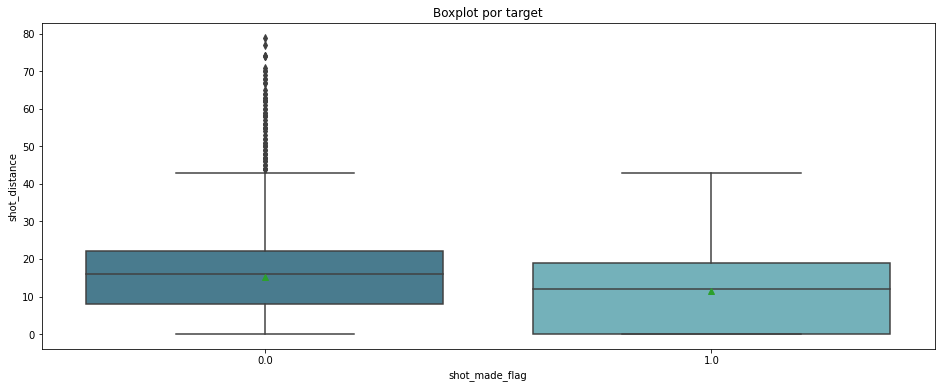

In [37]:
varx = 'shot_distance'
vary = 'shot_made_flag'

fig, axs = plt.subplots(figsize=(16,6))

sns.boxplot(x = vary,y= varx, data= dfn,palette='GnBu_d',showmeans=True ).set_title('Boxplot por target');

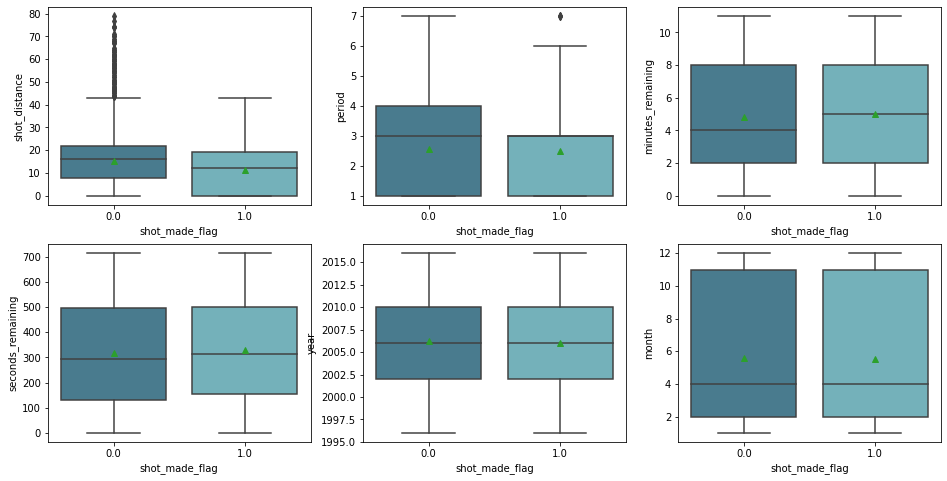

In [38]:
vary = 'shot_made_flag'

lista_var = ['shot_distance', 'period', 'minutes_remaining','seconds_remaining','year', 'month']

num_rows = 2
num_cols = 3

T=[]
for i in range(num_rows):
    for y in range(num_cols):
        t=(i,y)
        T.append(t)
        
        
fig, axs = plt.subplots(nrows=num_rows,ncols=num_cols,figsize=(16,8))

for i,varx in enumerate(lista_var):
    
    xt = T[i][0]
    yt = T[i][1]

    sns.boxplot(x = vary,y= varx, data= dfn,palette='GnBu_d',showmeans=True ,ax=axs[xt,yt] );

### analise por quintil

analise da variavel shot_distance

faixa 1: 0 ate 2
faixa 2: 2 ate 12
faixa 3: 12 ate 17
faixa 4: 17 ate 23
faixa 5: 23 ate 79


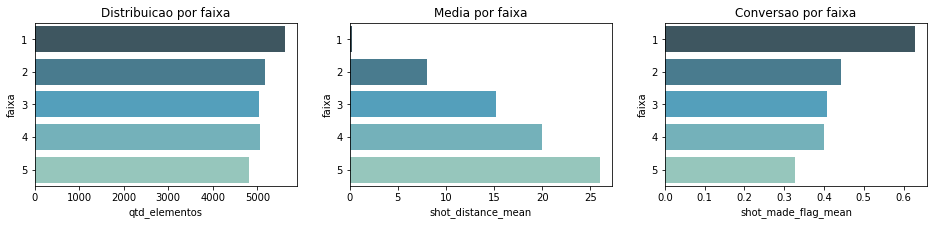

In [39]:
varx = 'shot_distance'
vary = 'shot_made_flag'

base = dfn[[varx, vary]]
base = base.groupby(pd.cut(base[varx], np.percentile(base[varx], list(range(0,120,20))),labels=range(1,6), include_lowest=True)).agg(['count','mean'])
base=base.reset_index().droplevel(0, axis=1)

base.columns= ['faixa','qtd_elementos', str(varx)+'_mean', 'drop_var', str(vary)+'_mean']
base.drop(['drop_var'],axis=1,inplace=True)


print('analise da variavel ' + varx)
print("")

fig, axs = plt.subplots(ncols=3,figsize=(16,3))

sns.barplot(x='qtd_elementos', y= 'faixa', data= base, ax= axs[0],palette='GnBu_d').set_title('Distribuicao por faixa')
sns.barplot(x=str(varx)+'_mean', y= 'faixa', data= base, ax= axs[1],palette='GnBu_d').set_title('Media por faixa')
sns.barplot(x=str(vary)+'_mean', y= 'faixa', data= base, ax= axs[2],palette='GnBu_d').set_title('Conversao por faixa');

fxs=[int(f) for f in list(np.percentile(dfn[varx], list(range(0,120,20))))]
fxs_aux=[int(f) for f in list(np.percentile(dfn[varx], list(range(0,120,20))))]
fxs_aux.pop(0)
fxs=list(zip(fxs,fxs_aux))

fxs = [str(i) + ' ate ' + str(j) for i,j in fxs]
[print("faixa "+ str(ind+1) + ": " + i) for ind,i in enumerate(fxs)];

### montando pra mais variaveis

analise da variavel shot_distance

faixa 1: 0 ate 2
faixa 2: 2 ate 12
faixa 3: 12 ate 17
faixa 4: 17 ate 23
faixa 5: 23 ate 79

analise da variavel minutes_remaining

faixa 1: 0 ate 1
faixa 2: 1 ate 4
faixa 3: 4 ate 6
faixa 4: 6 ate 9
faixa 5: 9 ate 11

analise da variavel seconds_remaining

faixa 1: 0 ate 109
faixa 2: 109 ate 240
faixa 3: 240 ate 376
faixa 4: 376 ate 542
faixa 5: 542 ate 714

analise da variavel year

faixa 1: 1996 ate 2001
faixa 2: 2001 ate 2005
faixa 3: 2005 ate 2008
faixa 4: 2008 ate 2011
faixa 5: 2011 ate 2016

analise da variavel month

faixa 1: 1 ate 2
faixa 2: 2 ate 3
faixa 3: 3 ate 5
faixa 4: 5 ate 11
faixa 5: 11 ate 12



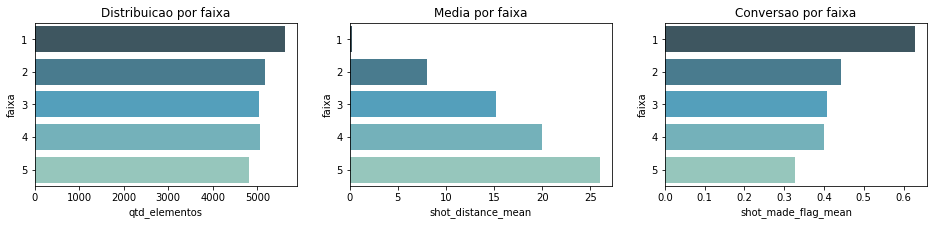

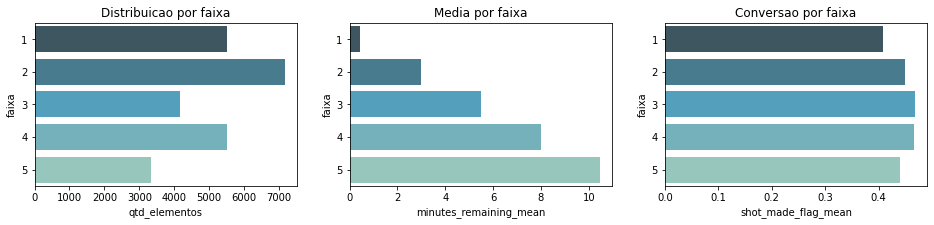

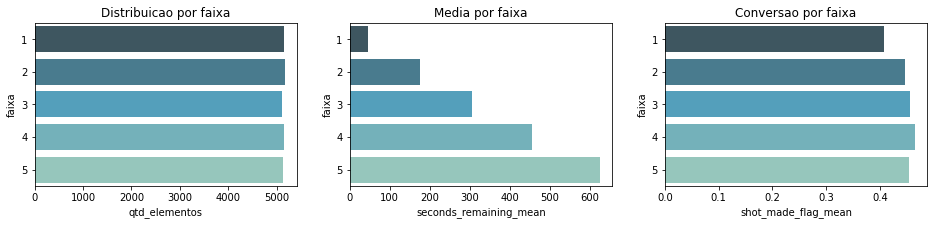

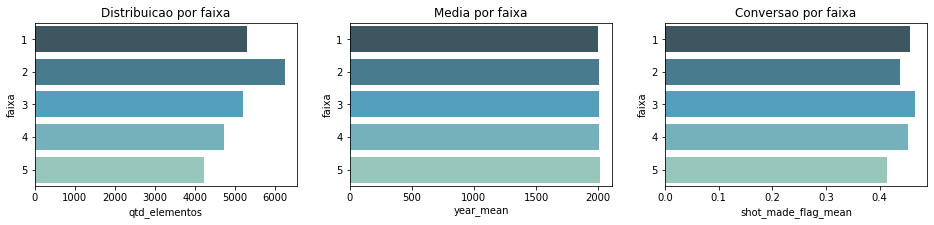

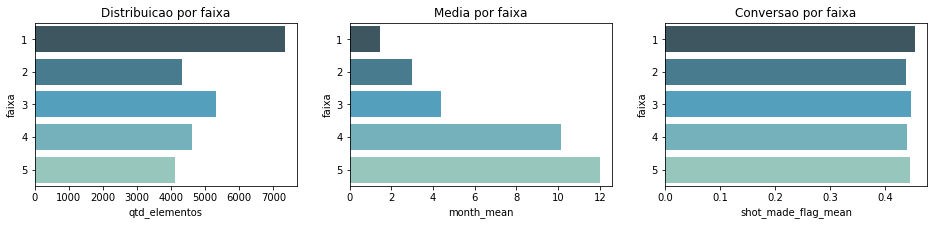

In [40]:
vary = 'shot_made_flag'

lista_var = ['shot_distance', 'period', 'minutes_remaining','seconds_remaining','year', 'month']

for varx in lista_var:

    try:
        
        base = dfn[[varx, vary]]
        base = base.groupby(pd.cut(base[varx], np.percentile(base[varx], list(range(0,120,20))),labels=range(1,6), include_lowest=True)).agg(['count','mean'])
        base=base.reset_index().droplevel(0, axis=1)

        base.columns= ['faixa','qtd_elementos', str(varx)+'_mean', 'drop_var', str(vary)+'_mean']
        base.drop(['drop_var'],axis=1,inplace=True)


        print('analise da variavel ' + varx)
        print("")

        fig, axs = plt.subplots(ncols=3,figsize=(16,3))

        sns.barplot(x='qtd_elementos', y= 'faixa', data= base, ax= axs[0],palette='GnBu_d').set_title('Distribuicao por faixa')
        sns.barplot(x=str(varx)+'_mean', y= 'faixa', data= base, ax= axs[1],palette='GnBu_d').set_title('Media por faixa')
        sns.barplot(x=str(vary)+'_mean', y= 'faixa', data= base, ax= axs[2],palette='GnBu_d').set_title('Conversao por faixa');
        
        fxs=[int(f) for f in list(np.percentile(dfn[varx], list(range(0,120,20))))]
        fxs_aux=[int(f) for f in list(np.percentile(dfn[varx], list(range(0,120,20))))]
        fxs_aux.pop(0)
        fxs=list(zip(fxs,fxs_aux))

        fxs = [str(i) + ' ate ' + str(j) for i,j in fxs]
        [print("faixa "+ str(ind+1) + ": " + i) for ind,i in enumerate(fxs)];
        print("")
        
    except:
        pass

### analisando a variavel boolean

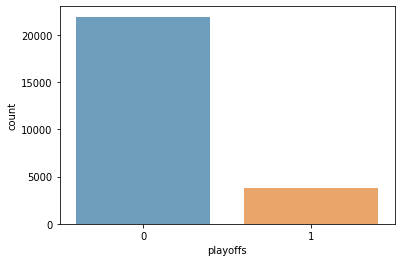

In [41]:
sns.countplot(data=dfn, x='playoffs', alpha=.7);

importante avaliar se temos um bom balanceamento, se nao a variavel se torna inutil

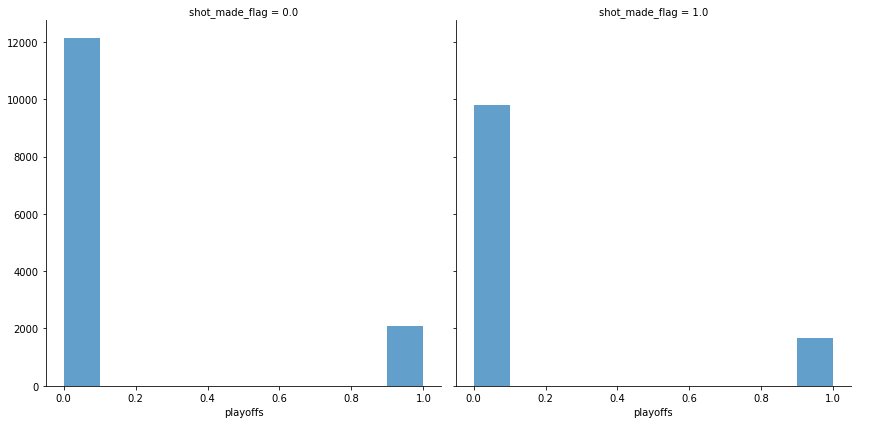

In [42]:
g = sns.FacetGrid(dfn, col="shot_made_flag",height=6)
g.map(plt.hist, "playoffs",alpha=.7)
g.add_legend();

alem disso avaliar se dentro da target esse balanceamento ainda faz sentido




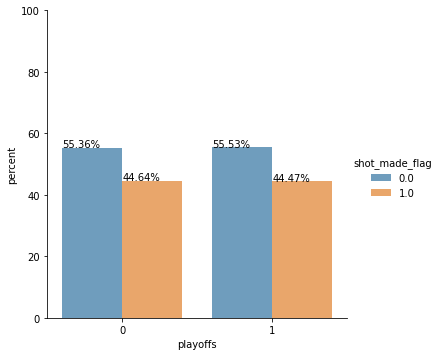

In [43]:
x,y = 'playoffs', 'shot_made_flag'

df1 = dfn.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,alpha =.7)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


In [44]:
import plotly.graph_objects as go

vary = 'shot_made_flag'

lista_var = ['playoffs']

for i in lista_var:
    
    varx = i
    
    cs = pd.crosstab(index=dfn[varx], columns=[dfn[vary]], margins=True).reset_index()
    cs['ipp'] = cs[1.0] / cs['All']

    ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


    cs.drop(cs.tail(1).index,inplace=True)


    cs['ipp_mean'] = ipp_mean


    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(x=cs[varx], y=cs.All, name="elementos"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
        secondary_y=True,
    )


    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
        secondary_y=True,
    )


    # Add figure title
    fig.update_layout(
        title_text="conversao e qtd de elementros por " + str(varx)
    )

    # Set x-axis title
    fig.update_xaxes(title_text= varx)

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
    fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

    fig.show()

### analise bivariada

### correlacao

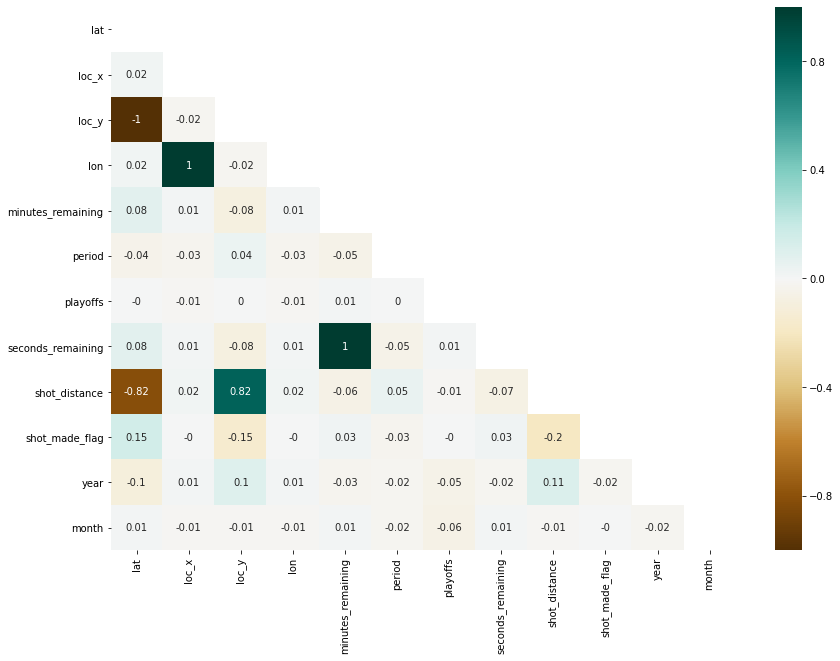

In [45]:
matrix = np.triu(dfn.corr())

fig, axs = plt.subplots(figsize=(14,10))

sns.heatmap(np.round(dfn.corr(),2), cmap ='BrBG' ,annot=True, mask=matrix);

lon e loc_x sao 100% correlacionados ! e lat eh loc_y sao inversamente proporcionais!

### analise com pairplot

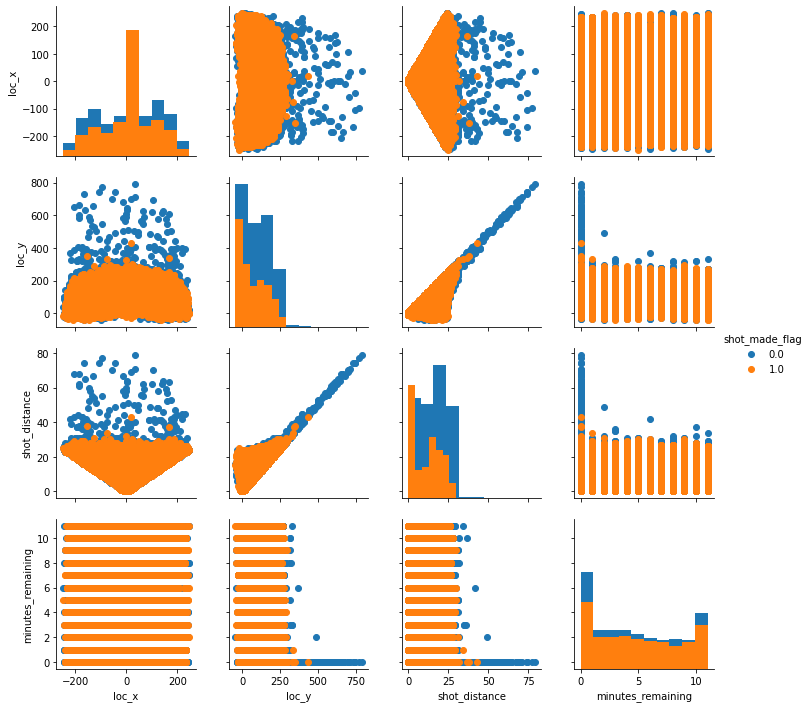

In [46]:
var =['loc_x','loc_y','shot_distance','minutes_remaining']
g = sns.PairGrid(data=dfn, x_vars=var ,y_vars=var, hue="shot_made_flag")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

### dando um zoom

### loc_x vs loc_y

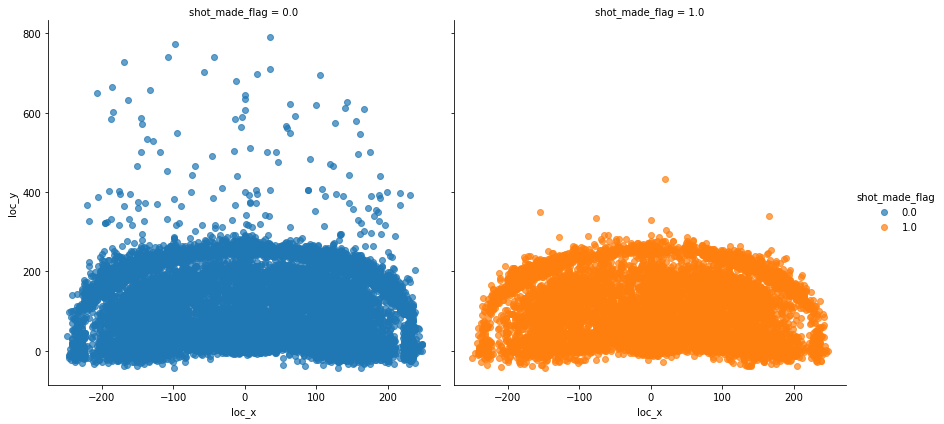

In [47]:
g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag',height=6)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)


g.add_legend();

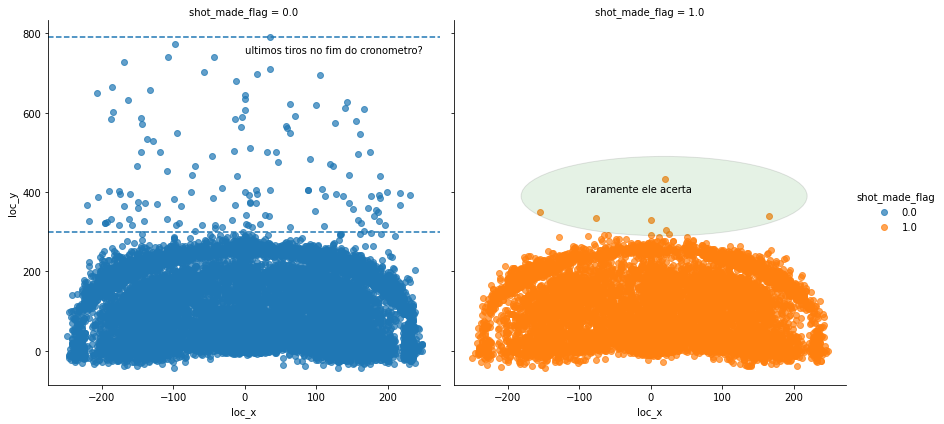

In [48]:
g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag',height=6)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)

ax1, ax2 = g.axes[0]

ax1.axhline(790, ls='--')
ax1.axhline(300, ls='--')

ax1.text(000,750, "ultimos tiros no fim do cronometro?")


ax2.add_patch(
patches.Ellipse(
(19, 390), # (x,y)
400, # width
200, # height
00, # radius
alpha=0.1, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'
)
)
ax2.text(-90,400, "raramente ele acerta")

g.add_legend();

so com essa loc_y ja da pra limar alguns dos erros.. tipo loc_y> 300

In [49]:
dfn[dfn.loc_y>300].shot_made_flag.value_counts()

0.00    136
1.00      6
Name: shot_made_flag, dtype: int64

In [50]:
dfn[dfn.loc_y>300].shot_made_flag.value_counts(normalize=True)

0.00   0.96
1.00   0.04
Name: shot_made_flag, dtype: float64

### shot_distance x loc_x

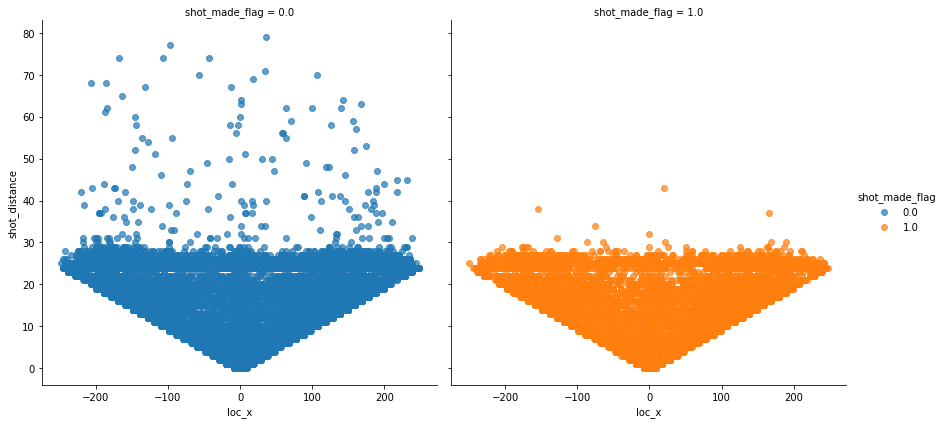

In [51]:
g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag',height=6)
g.map(plt.scatter, 'loc_x',"shot_distance", alpha=.7)
g.add_legend();

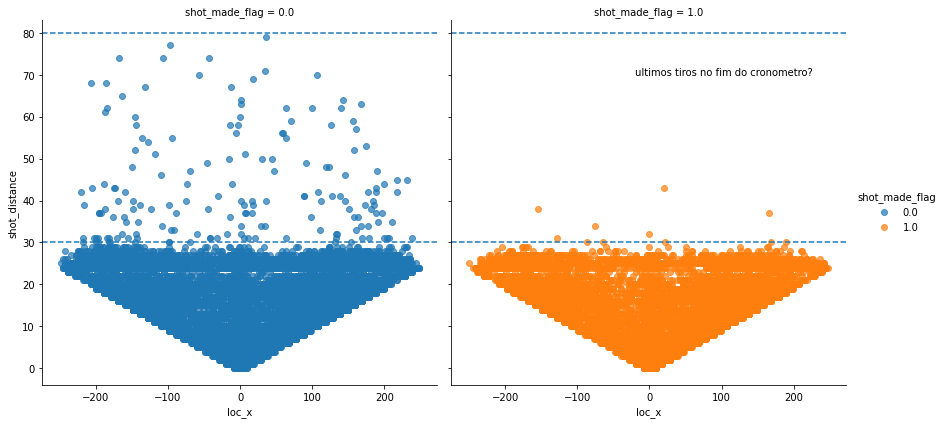

In [52]:
g = sns.FacetGrid(dfn, col="shot_made_flag",hue='shot_made_flag',height=6)
g.map(plt.scatter, 'loc_x',"shot_distance", alpha=.7)

ax1, ax2 = g.axes[0]

ax1.axhline(80, ls='--')
ax1.axhline(30, ls='--')


ax2.axhline(80, ls='--')
ax2.axhline(30, ls='--')

ax2.text(-20,70, "ultimos tiros no fim do cronometro?")

g.add_legend();

so com essa shot_distance tambem da pra limar alguns dos erros.. tipo shot_distance > 30

In [53]:
dfn[dfn.shot_distance>30].shot_made_flag.value_counts()

0.00    159
1.00      6
Name: shot_made_flag, dtype: int64

In [54]:
dfn[dfn.shot_distance>30].shot_made_flag.value_counts(normalize=True)

0.00   0.96
1.00   0.04
Name: shot_made_flag, dtype: float64

## analisando variaveis categoricas

In [55]:
dfs.head()

action_type combined_shot_type       shot_type  \
1          Jump Shot          Jump Shot  2PT Field Goal   
2          Jump Shot          Jump Shot  2PT Field Goal   
3          Jump Shot          Jump Shot  2PT Field Goal   
4  Driving Dunk Shot               Dunk  2PT Field Goal   
5          Jump Shot          Jump Shot  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range  \
1           Left Side(L)        Mid-Range         8-16 ft.   
2   Left Side Center(LC)        Mid-Range        16-24 ft.   
3  Right Side Center(RC)        Mid-Range        16-24 ft.   
4              Center(C)  Restricted Area  Less Than 8 ft.   
5           Left Side(L)        Mid-Range         8-16 ft.   

            team_name    matchup opponent  last_5_sec_in_period  
1  Los Angeles Lakers  LAL @ POR      POR                 False  
2  Los Angeles Lakers  LAL @ POR      POR                 False  
3  Los Angeles Lakers  LAL @ POR      POR                 False  
4  Los Angeles Lakers  LAL @ POR      POR                 False  
5  Los Angeles Lakers  LAL @ POR      POR                 False

In [56]:
dfs['shot_made_flag'] = df_EDA.shot_made_flag

### analisando classes das variaveis categoricas

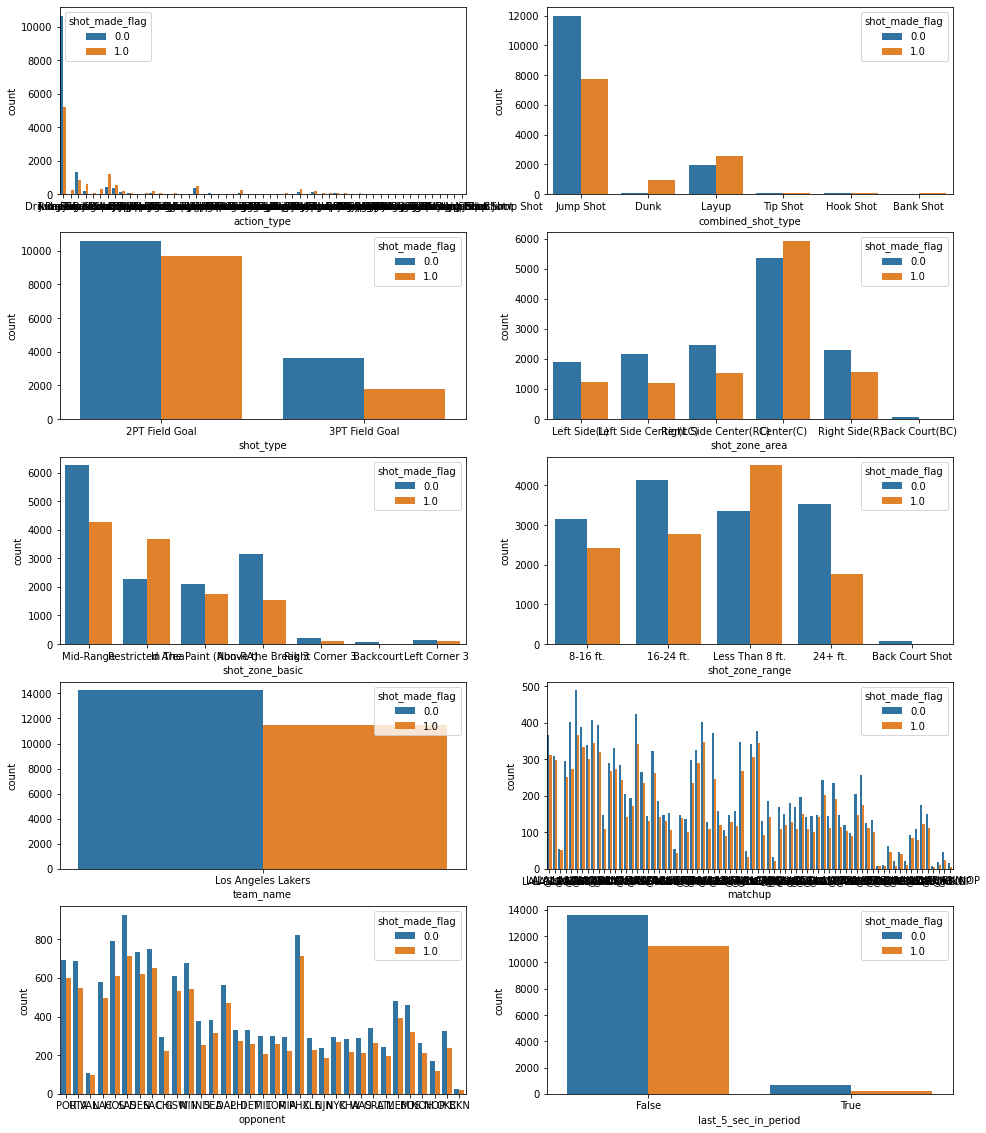

In [57]:
vary = 'shot_made_flag'

lista_var = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup',
       'opponent', 'last_5_sec_in_period']


num_rows = 5
num_cols = 2

T=[]
for i in range(num_rows):
    for y in range(num_cols):
        t=(i,y)
        T.append(t)
        
        
fig, axs = plt.subplots(nrows=num_rows,ncols=num_cols,figsize=(16,20))

for i,varx in enumerate(lista_var):
    
    xt = T[i][0]
    yt = T[i][1]

    sns.countplot(x = varx, hue= vary, data= dfs , ax=axs[xt,yt] );
    

### % conversao [shot_zone_area]

In [58]:
import plotly.graph_objects as go

varx = 'shot_zone_area'
vary = 'shot_made_flag'


cs = pd.crosstab(index=dfs[varx], columns=[dfs[vary]], margins=True).reset_index()
cs['ipp'] = cs[1.0] / cs['All']

ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


cs.drop(cs.tail(1).index,inplace=True)
cs = cs.sort_values(by=['All'], ascending=False)

cs['ipp_mean'] = ipp_mean


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=cs[varx], y=cs.All, name="elementos"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="conversao e qtd de elementros por " + str(varx)
)

# Set x-axis title
fig.update_xaxes(title_text= varx)

# Set y-axes titles
fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

fig.show()

### % conversao [geralzao]

In [59]:
import plotly.graph_objects as go

vary = 'shot_made_flag'

lista_var = dfs.columns

for i in lista_var:
    
    varx = i
    
    cs = pd.crosstab(index=dfs[varx], columns=[dfs[vary]], margins=True).reset_index()
    cs['ipp'] = cs[1.0] / cs['All']

    ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


    cs.drop(cs.tail(1).index,inplace=True)
    cs = cs.sort_values(by=['All'], ascending=False)

    cs['ipp_mean'] = ipp_mean


    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(x=cs[varx], y=cs.All, name="elementos"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
        secondary_y=True,
    )


    fig.add_trace(
        go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
        secondary_y=True,
    )


    # Add figure title
    fig.update_layout(
        title_text="conversao e qtd de elementros por " + str(varx)
    )

    # Set x-axis title
    fig.update_xaxes(title_text= varx)

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
    fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

    fig.show()

### correlacao variaveis cat-cat

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9#0bd4

Cramer’s V

What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:

1. Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

2. Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [60]:
from dython.nominal import compute_associations

mtz_v=compute_associations(dfs, theil_u=False)
mtz_v

action_type  combined_shot_type  shot_type  \
action_type                  1.00                1.00       0.38   
combined_shot_type           1.00                1.00       0.28   
shot_type                    0.38                0.28       1.00   
shot_zone_area               0.30                0.27       0.50   
shot_zone_basic              0.42                0.43       0.99   
shot_zone_range              0.45                0.41       0.99   
team_name                    0.00                0.00       0.00   
matchup                      0.04                0.04       0.07   
opponent                     0.04                0.03       0.05   
last_5_sec_in_period         0.07                0.04       0.13   
shot_made_flag               0.38                0.25       0.12   

                      shot_zone_area  shot_zone_basic  shot_zone_range  \
action_type                     0.30             0.42             0.45   
combined_shot_type              0.27             0.43             0.41   
shot_type                       0.50             0.99             0.99   
shot_zone_area                  1.00             0.60             0.69   
shot_zone_basic                 0.60             1.00             0.83   
shot_zone_range                 0.69             0.83             1.00   
team_name                       0.00             0.00             0.00   
matchup                         0.05             0.05             0.06   
opponent                        0.04             0.04             0.04   
last_5_sec_in_period            0.28             0.27             0.30   
shot_made_flag                  0.15             0.21             0.19   

                      team_name  matchup  opponent  last_5_sec_in_period  \
action_type                0.00     0.04      0.04                  0.07   
combined_shot_type         0.00     0.04      0.03                  0.04   
shot_type                  0.00     0.07      0.05                  0.13   
shot_zone_area             0.00     0.05      0.04                  0.28   
shot_zone_basic            0.00     0.05      0.04                  0.27   
shot_zone_range            0.00     0.06      0.04                  0.30   
team_name                  0.00     0.00      0.00                  0.00   
matchup                    0.00     1.00      1.00                  0.05   
opponent                   0.00     1.00      1.00                  0.03   
last_5_sec_in_period       0.00     0.05      0.03                  1.00   
shot_made_flag             0.00     0.05      0.04                 -0.07   

                      shot_made_flag  
action_type                     0.38  
combined_shot_type              0.25  
shot_type                       0.12  
shot_zone_area                  0.15  
shot_zone_basic                 0.21  
shot_zone_range                 0.19  
team_name                       0.00  
matchup                         0.05  
opponent                        0.04  
last_5_sec_in_period           -0.07  
shot_made_flag                  1.00

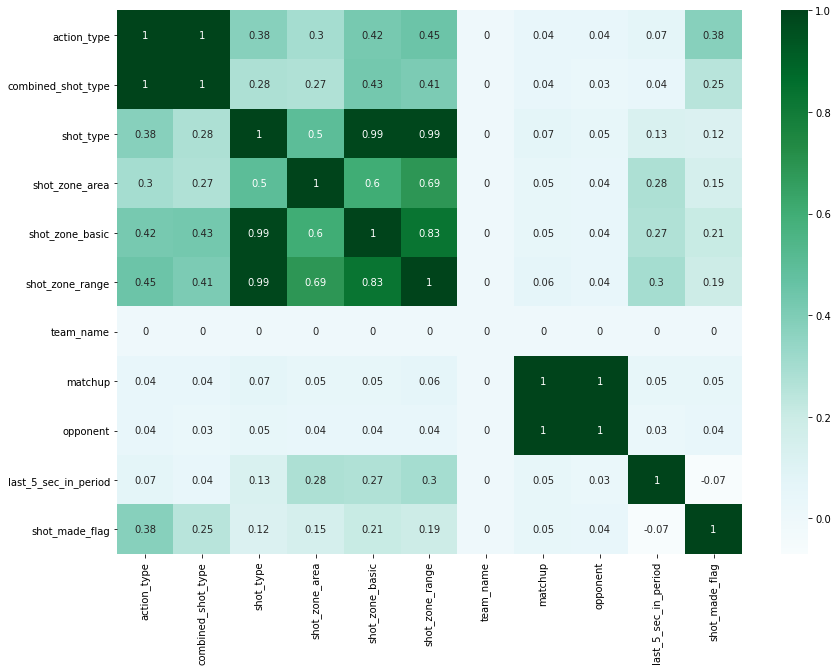

In [61]:
fig, axs = plt.subplots(figsize=(14,10))
sns.heatmap(np.round(mtz_v,2), cmap ='BuGn' ,annot=True);

Theil’s U, also referred to as the Uncertainty Coefficient

s based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V). Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.

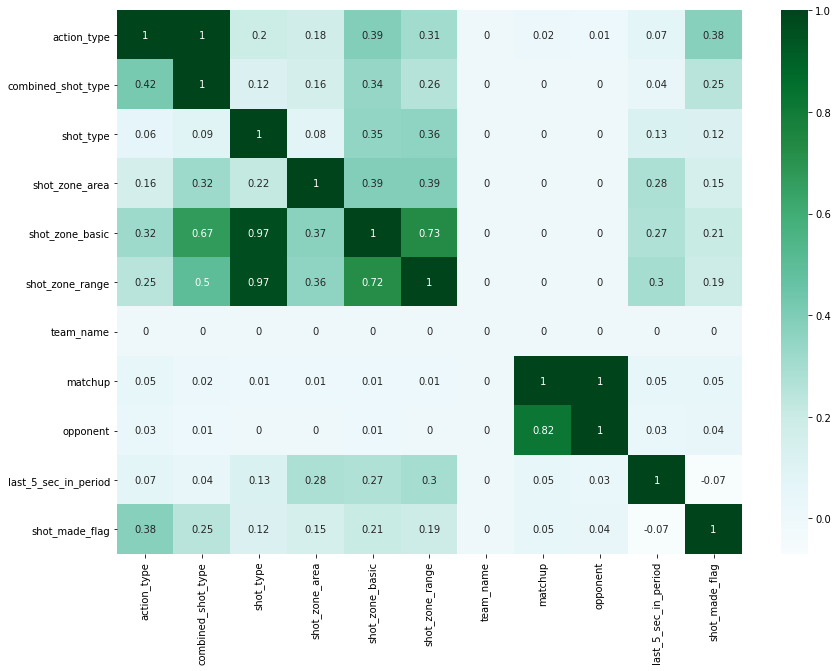

In [62]:
from dython.nominal import compute_associations

mtz_u=compute_associations(dfs, theil_u=True)

fig, axs = plt.subplots(figsize=(14,10))
sns.heatmap(np.round(mtz_u,2), cmap ='BuGn' ,annot=True);

### correlacao variaveis cat-num

In [63]:
df2 = df_EDA[['lat','loc_x','loc_y','lon','action_type','combined_shot_type','shot_distance','shot_zone_range']]

In [64]:
from dython.nominal import compute_associations

compute_associations(df2, theil_u=True)

lat  loc_x  loc_y   lon  action_type  combined_shot_type  \
lat                 1.00   0.02  -1.00  0.02         0.59                0.55   
loc_x               0.02   1.00  -0.02  1.00         0.07                0.04   
loc_y              -1.00  -0.02   1.00 -0.02         0.59                0.55   
lon                 0.02   1.00  -0.02  1.00         0.07                0.04   
action_type         0.59   0.07   0.59  0.07         1.00                1.00   
combined_shot_type  0.55   0.04   0.55  0.04         0.42                1.00   
shot_distance      -0.82   0.02   0.82  0.02         0.79                0.76   
shot_zone_range     0.79   0.05   0.79  0.05         0.25                0.50   

                    shot_distance  shot_zone_range  
lat                         -0.82             0.79  
loc_x                        0.02             0.05  
loc_y                        0.82             0.79  
lon                          0.02             0.05  
action_type                  0.79             0.31  
combined_shot_type           0.76             0.26  
shot_distance                1.00             0.97  
shot_zone_range              0.97             1.00

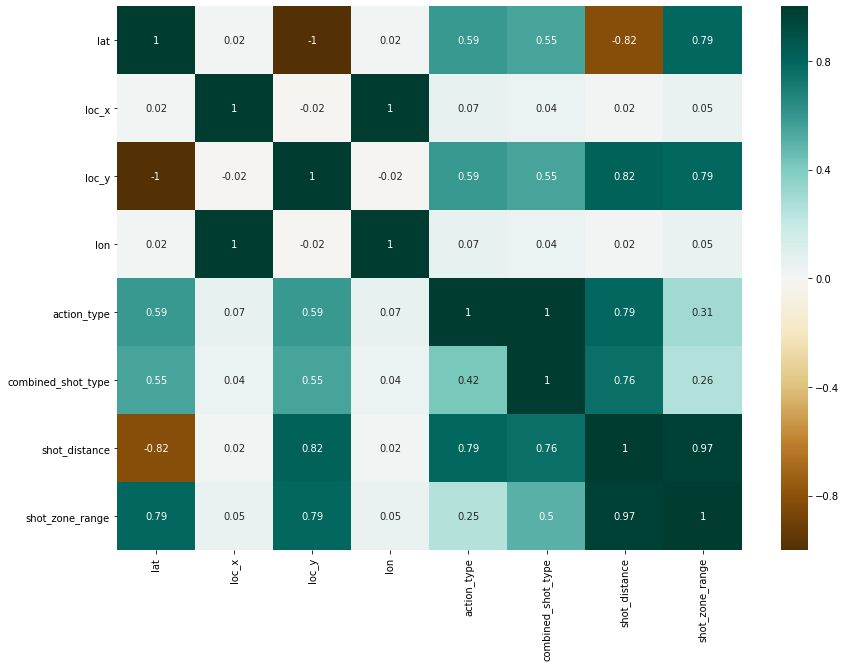

In [65]:
fig, axs = plt.subplots(figsize=(14,10))

mtz= compute_associations(df2, theil_u=True)
sns.heatmap(np.round(mtz,2), cmap ='BrBG' ,annot=True);

###  analisando de forma combinada (int+str)

### boxplots

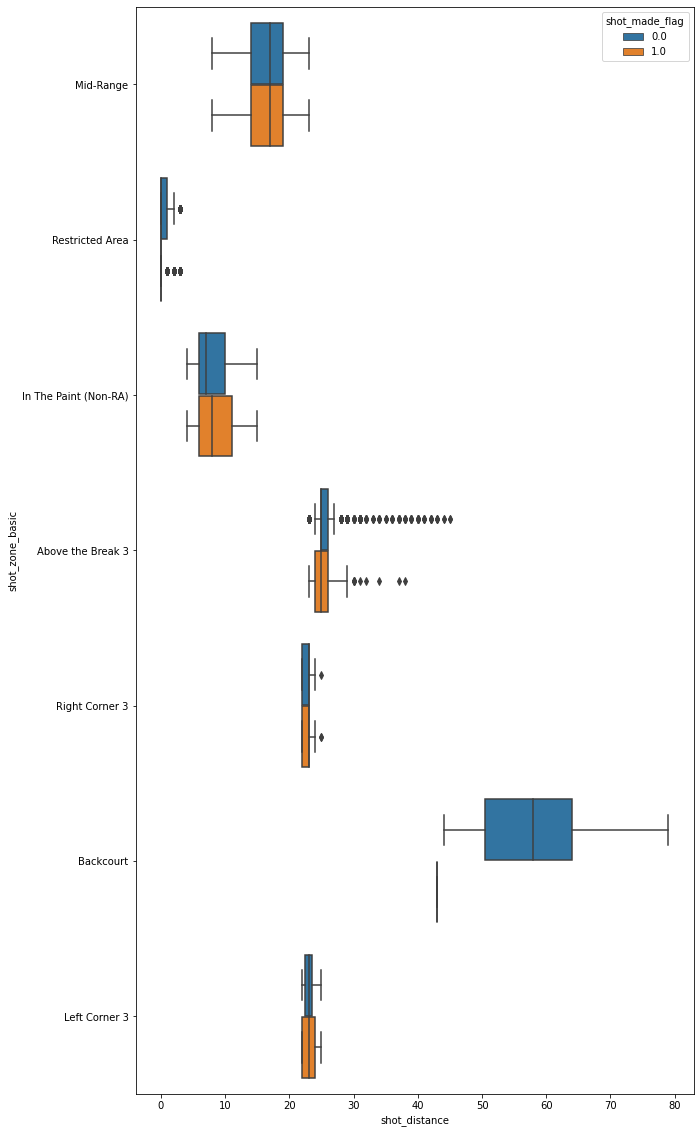

In [66]:
fig, ax = plt.subplots(figsize=(10,20))

ax = sns.boxplot(x='shot_distance' , y="shot_zone_basic",hue="shot_made_flag",
                 data=df_EDA)

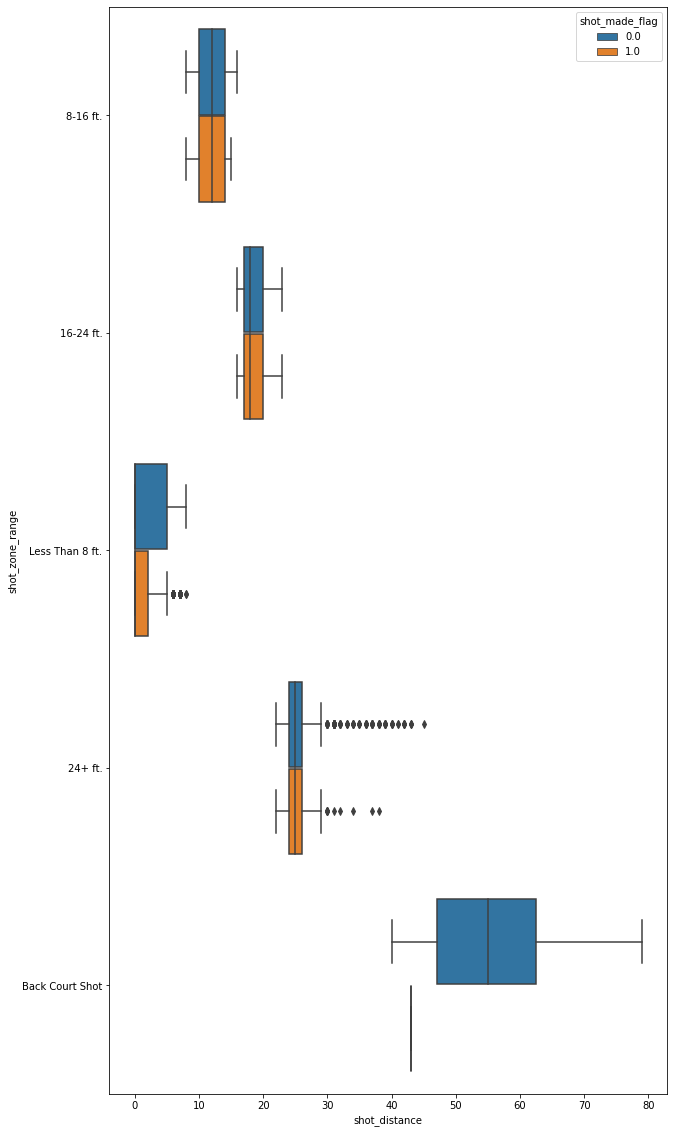

In [67]:
fig, ax = plt.subplots(figsize=(10,20))

ax = sns.boxplot(x='shot_distance' , y="shot_zone_range",hue="shot_made_flag",
                 data=df_EDA)

### grafico de dispersao com classes

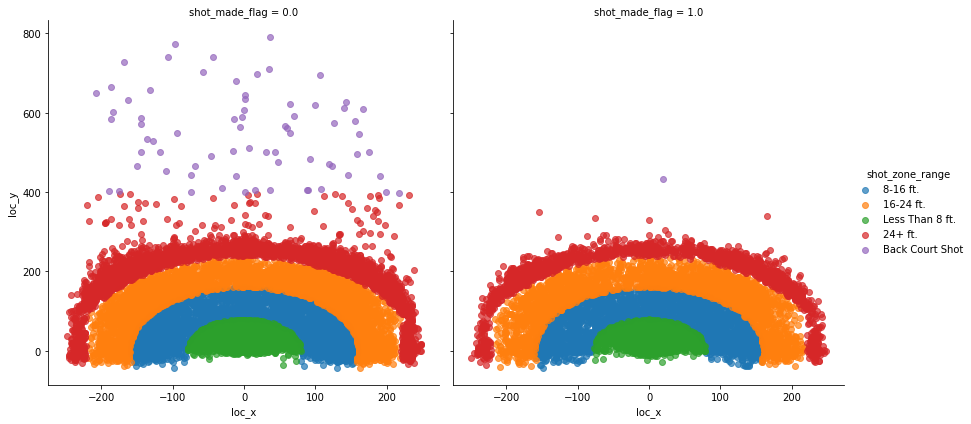

In [68]:
g = sns.FacetGrid(df_EDA, col="shot_made_flag",hue='shot_zone_range',height=6)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)


g.add_legend();

In [69]:
import plotly.graph_objects as go

varx = 'shot_zone_basic'
vary = 'shot_made_flag'


cs = pd.crosstab(index=dfs[varx], columns=[dfs[vary]], margins=True).reset_index()
cs['ipp'] = cs[1.0] / cs['All']

ipp_mean = cs[cs[varx] == 'All'].ipp.values.item()


cs.drop(cs.tail(1).index,inplace=True)
cs = cs.sort_values(by=['All'], ascending=False)

cs['ipp_mean'] = ipp_mean


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=cs[varx], y=cs.All, name="elementos"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp, name="conv"),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=cs[varx], y=cs.ipp_mean, name="conv_mean"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="conversao e qtd de elementros por " + str(varx)
)

# Set x-axis title
fig.update_xaxes(title_text= varx)

# Set y-axes titles
fig.update_yaxes(title_text="<b>contagem</b> elementos", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b> conversao", secondary_y=True)

fig.show()

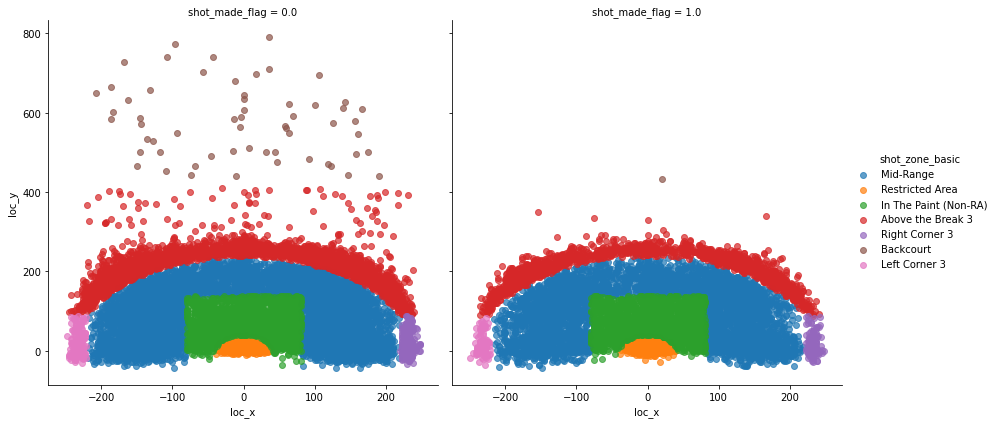

In [70]:
g = sns.FacetGrid(df_EDA, col="shot_made_flag",hue='shot_zone_basic',height=6)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)


g.add_legend();

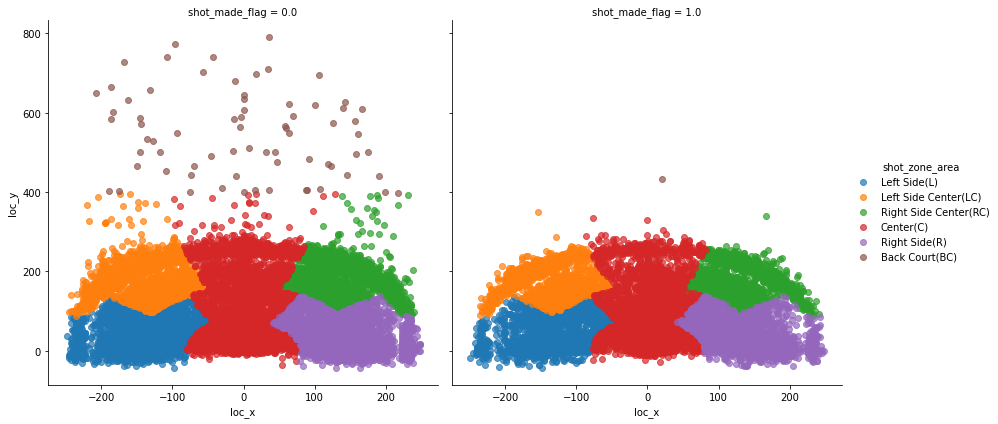

In [71]:
g = sns.FacetGrid(df_EDA, col="shot_made_flag",hue='shot_zone_area',height=6)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)


g.add_legend();

uma visao invertida tb

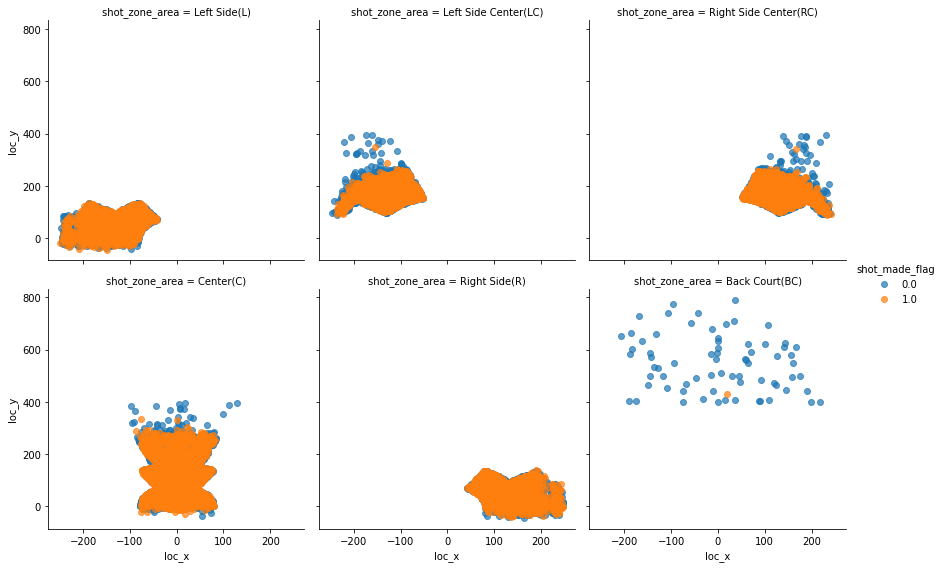

In [72]:
g = sns.FacetGrid(df_EDA, col="shot_zone_area",hue='shot_made_flag',height=4,col_wrap=3)
g.map(plt.scatter, "loc_x", "loc_y", alpha=.7)


g.add_legend();

## EXTRA

### analisando com sweetviz

In [73]:
import sweetviz as sw

In [74]:
advert_report = sw.analyze(df_EDA, target_feat= 'shot_made_flag')
advert_report.show_html("Report.html") 

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### analise comparativa entre duas amostras

In [75]:
df_EDA2 = df_EDA.copy()

df_EDA2.drop('game_date', axis=1, inplace=True)

df1 = df_EDA2[df_EDA2.shot_made_flag==0]
df2 = df_EDA2[df_EDA2.shot_made_flag==1]

advert_report2 = sw.compare([df1, '0'],[df2, '1'])
advert_report2.show_html("Report.html") 

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
